# **QE: MMW(2021, JME)**

# **deep learning for solving dynamic economic model** <br/>

Lilia Maliar(The Graduate Center, City University of New York, and Hoover Institution Stanford University) <br/>
Serguei Maliar(Santa Clara University) <br/>
Pablo Winant(ESCP Business school and CREST) <br/>

Dong Gyun Ko <br/>
last updated: july 4, 2022

In [1]:
# !pip install tensorflow==2.8.0

In [2]:
# import libraries

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm # tqdm: library visualizing ongoing loops
from IPython.display import Image
from typing import Tuple
class Vector: pass

import datetime
# import os

# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# os.chdir('/content/gdrive/MyDrive/Colab_Notebooks/data')

## **1. casting dynamic economic models into DL expectation functions**

### **1.1. dynamic economic models**

* **modern economic dynamics $\Leftrightarrow$ Markov decision process(MDP)** <br/>

$\;\;\;\;\;\;\;$ $\Rightarrow$ dynamic Markov economic models with time-invariant functions <br/>

$\;\;\;\;\;\;\;$ $\Rightarrow$ agent solves a canonical intertemporal optimization problem.


* **definition 1.1.** optimization problem <br/>
   
   (1) exogenous state ($m_{t+1}$) <br/>

   $\;\;\;\;$ $m_{t+1}=M(m_{t}, \epsilon_{t})$ **eq. (1)** <br/>

   $\;\;\;\;$, where <br/>
   
   $\;\;\;\;$ $m_{t+1}\in\mathbb{R}^{n_{m}}$, $\epsilon_{t}\in\mathbb{R}^{m}$: $i.i.d.$ innovation term, $M$: transition function <br/>

   $\;\;\;\;$ $\Rightarrow$ $m_{t+1}$ follows a **Markov** process! <br/> <br/>

   (2) endogenous state ($s_{t+1}$) <br/>

   $\;\;\;\;$ $s_{t+1}=S(m_{t},\,s_{t},\,x_{t},\,m_{t+1})$ **eq. (2)** <br/>

   $\;\;\;\;$, where <br/>
   
   $\;\;\;\;$ $m_{t}$: exogenous state, $x_{t}\in\mathbb{R}^{n_{x}}$: choice, $S$: transition function <br/> <br/>

   (3) choice ($x_{t}$) <br/>

   $\;\;\;\;$ $x_{t}\in X(m_{t}, s_{t})$ **eq. (3)** <br/> <br/>

   (4) optimization problem <br/>

   $\;\;\;\;$ $max_{\{x_{t},\,s_{t+1}\}^{\infty}_{t=0}}$ $E_{0}\Big[\sum_{t=0}^{\infty}\beta^{t}r(m_{t},\,s_{t},\,x_{t})\Big]$ **eq. (4)** <br/>

   $\;\;\;\;$, where <br/>
   
   $\;\;\;\;$ $r(m_{t},\,s_{t},\,x_{t})$: reward, $\beta\in[0,\,1)$: discount factor, <br/>

   $\;\;\;\;$ $E_{0}[\cdot]$: expectation function across $(\epsilon_{1},\,\epsilon_{2},\,\cdots)$ conditional on $(m_{0},\,s_{0})$

* **definition 1.2.** decision rules <br/>

  (1) optimal decision rule <br/>

  $\;\;\;\;$ $\varphi:\;\mathbb{R}^{n_{m}}\times\mathbb{R}^{n_{s}}\rightarrow\mathbb{R}^{n_{x}}$  <br/>

  $\;\;\;\;$ such that $x_{t}=\varphi(m_{t},\,s_{t})\in X(m_{t},\,s_{t})$ for $\forall\;t$ and $\{x_{t},\,s_{t+1}\}^{\infty}_{t=0}$ maximize **eq. (4)** for $\forall\;(m_{0},\,s_{0})$ <br/> <br/>

  (2) parametric decision rule <br/>

  $\;\;\;\;$ a member of a family of $\varphi(\cdot;\theta)$ parameterized by a real vector $\theta\in\Theta$ <br/>

  $\;\;\;\;$ such that for each $\theta$, $\varphi:\;\mathbb{R}^{n_{m}}\times\mathbb{R}^{n_{s}}\rightarrow\mathbb{R}^{n_{x}}$ and $x_{t}=\varphi(m_{t},\,s_{t})\in X(m_{t},\,s_{t})$ for $\forall\;t$ <br/> <br/>

 $\Rightarrow$ $\therefore$ our goal is to find a vector of parameters $\theta\in\Theta$ under which the parametric decision rule $\varphi(\cdot;\theta)$ 
 
 $\;\;\;\;\;\;\;\;$ provides an accurate approximation of the optimal decision rule $\varphi$ on a relevant domain.

### **1.2. objective 1: lifetime-reward maximization**

* **definition 1.3.** value function <br/>

 (1) maximum expeted lifetime reward <br/> <br/>

 $\;\;\;\;$ given distribution of shocks $(\epsilon_{1},\,...\,\epsilon_{T})$, initial condition $(m_{0},\,s_{0})$, <br/> <br/>

 $\;\;\;\;$ $V(m_{0},\,s_{0})\equiv max_{\{x_{t},\,s_{t+1}\}^{\infty}_{t=0}}$ $E_{(\epsilon_{1},\,...\,
  \epsilon_{T})}\Big[\sum_{t=0}^{\infty}\beta^{t}r(m_{t},\,s_{t},\,x_{t})\Big]$ **eq. (5)** <br/> <br/>

 $\;\;\;\;$, where <br/>
  
 $\;\;\;\;$transitions determined by **eq. (1)-(3)** <br/> <br/>

 (2) finite-horizon problem <br/> <br/>

 $\;\;\;\;$ $V^{T}(m_{0},\,s_{0};\,\theta)\equiv E_{(\epsilon_{1},\,...\,
  \epsilon_{T})}\Big[\sum_{t=0}^{T}\beta^{t}r(m_{t},\,s_{t},\,\varphi(m_{t},\,s_{t};\,\theta))\Big]$ **eq. (6)** <br/> 

* **definition 1.4.** all-in-one(AiO) expectation operator for lifetime reward <br/>

 in order to reduce the cost of nested integration, <br/>

 we introduce **all-in-one(AiO) expectation operator** that combines the two expectation operators into one. <br/> <br/>

 $\Xi(\theta)\equiv E_{(m_{0},\,s_{0})}\bigg[E_{(\epsilon_{1},\,...,\epsilon_{T})}\Big[\sum_{t=0}^{\infty}\beta^{t}r(m_{t},\,s_{t},\,\varphi(m_{t},\,s_{t};\,\theta))\Big]\bigg]$ **eq. (7)** <br/> <br/>

 $\Rightarrow$ $\Xi(\theta)=E_{\omega}[\xi(\omega;\,\theta)]\equiv E_{(m_{0},\,s_{0},\,\epsilon_{1},\,...,\epsilon_{T})}\Big[\sum_{t=0}^{\infty}\beta^{t}r(m_{t},\,s_{t},\,\varphi(m_{t},\,s_{t};\,\theta))\Big]$ **eq. (8)** <br/> <br/>

 $\;\;\;\;\;$, where <br/>
 
 $\;\;\;\;\;$ $T>0$, <br/>

 $\;\;\;\;\;$ $\omega\equiv(m_{0},\,s_{0},\,\epsilon_{1},\,...,\epsilon_{T})$, <br/>

 $\;\;\;\;\;$ transitions determined by **eq. (1)-(3)**, <br/>

 $\;\;\;\;\;$ $\xi$: integrand <br/> <br/>

 $\Rightarrow$ $\therefore$ $n\times n^{'}$ draws $\longrightarrow$ $n$ draws for $\omega$ <br/>

### **1.3. objective 2: Euler-residual minimization**

* **definition 1.5.** Euler equations <br/> <br/>

 $E_{\epsilon}\Big[f_{i}(m,\,s,\,x,\,m^{'},\,s^{'},\,x^{'})\Big]=0, j=1, ..., J$ **eq. (9)** <br/> <br/>

 , where $m^{'}=M(m,\,\epsilon)$, <br/>

 $\;\;\;\;\;\;\;\;\;\;\;$ $s^{'}=S(m,\,s,\,x,\,m^{'})$, <br/>

 $\;\;\;\;\;\;\;\;\;\;\;$ $x\in X(m,\,s)$, <br/>

 $\;\;\;\;\;\;\;\;\;\;\;$ $f_{j}:\;\mathbb{R}^{n_{m}}\times\mathbb{R}^{n_{s}}\times\mathbb{R}^{n_{x}}\times\mathbb{R}^{n_{m}}\times\mathbb{R}^{n_{s}}\times\mathbb{R}^{n_{x}}\rightarrow\mathbb{R}$, <br/>

 $\;\;\;\;\;\;\;\;\;\;\;$ $E_{\epsilon}[\cdot]$: expectation operator w.r.t $\epsilon$

* **definition 1.6.** Euler-residual minimization <br/>

 the typical approach in computational economics is to solve Euler eq. on a **fixed grid** that covers a relevant area oh the state space. <br/>

 $\Rightarrow$ but we assume that state $(m,\,s)$ are **drawn randomly** from a given distribution. <br/>
 
 $\Rightarrow$ our goal is to construct a **decision rule** $\varphi(\cdot;\,\theta)$ solves $min_{\theta\in\Theta}\Xi(\theta)$! <br/> <br/>

 $\Xi(\theta)=E_{(m,\,s)}\Bigg[\sum_{j=1}^{J}v_{j}\bigg(E_{\epsilon}\Big[f_{i}(m,\,s,\,\varphi(m,\,s;\,\theta),\,m^{'},\,s^{'},\,\varphi(m^{'},\,s^{'};\,\theta)\Big]\bigg)^{2}\Bigg]$ **eq. (10)** <br/> <br/>

 , where $(v_{1},\,...,v_{J})$: vector of weights on $J$ optimality conditions

* **definition 1.7.** Euler-residual minimization with AiO expectation operator <br/> <br/>

 $\Xi(\theta)=E_{\omega}[\xi(\omega;\theta)]\equiv E_{(m,\,s,\,\epsilon_{1},\,\epsilon_{2})}\Bigg[\sum_{j=1}^{J}v_{j}\bigg(E_{\epsilon}\Big[f_{j}(m,\,s,\,x,\,m^{'},\,s^{'},\,x^{'})|_{\epsilon=\epsilon_{1}}\Big]\Big[f_{j}(m,\,s,\,x,\,m^{'},\,s^{'},\,x^{'})|_{\epsilon=\epsilon_{2}}\Big]\bigg)\Bigg]$ **eq. (11)** <br/> <br/>

 , where $(v_{1},\,...,v_{J})$: vector of weights on $J$ optimality conditions

### **1.4. objective 3: bellman-residual minimization**

* **definition 1.8** Bellman equation <br/>

 value function $V$: $\mathbb{R}^{n_{m}}\times\mathbb{R}^{n_{s}}\rightarrow\mathbb{R}$ associated with **eq.(4)**. <br/> <br/>

 $V(m,\,s)=max_{x,s^{'}}\bigg[r(m,s,x)+\beta E_{\epsilon}\Big[V(m^{'},\,s^{'})\Big]\bigg]$ **eq.(13)** <br/> <br/>

 $s.t.$ $m^{'}=M(m,\epsilon)$ **eq.(1)** <br/>

 $\;\;\;\;\;\;$ $s^{'}=S(m,\,s,\,x,\,m^{'})$ **eq.(2)** <br/>

 $\;\;\;\;\;\;$ $x\in X(m,\,s)$ <br/> <br/>

 $\Xi(\theta)=E_{m,\,s)}=\bigg[V(m,\,s)-max_{x,s^{'}}\Big[r(m,\,s,\,x)+\beta\big[V(m^{'},\,s^{'})\big]\Big]\bigg]^{2}$ <br/>

 **FOC**: $r_{x}(m,\,s,\,x)+\beta\Big[E_{\epsilon}\big[V_{s^{'}}(m^{'},\,s^{'})\big]\Big]\cdot\frac{\partial s^{'}}{\partial x}=0$ <br/>

 **envelope condition**: $r_{s}(m,\,s,\,x)=V_{s}(m,\,s)$ <br/>

 **direct optimization**: $max_{x,s^{'}}\Big[r(m,\,s,\,x)+\beta\big[V(m^{'},\,s^{'})\big]\Big]$ <br/>



* **definition 1.9** Bellman-residual minimization <br/>

 given $\theta\equiv(\theta_{1},\,\theta_{2})$ <br/>

 the squared residuals in the Bellman equations associated with $V(\cdot;\,\theta_{1})$ and $x=\varphi(\cdot;\,\theta_{2})$ <br/> <br/>

 $\Xi(\theta)\equiv E_{(m,s)}\bigg[V(m,\,s;\,\theta_{1})-r(m,\,s,\,x)-\beta E_{\epsilon}\Big[V(m^{'},\,s^{'};\,\theta_{1})\Big]\bigg]^{2}+vE_{(m,s)}\bigg[r_{x}(m,\,s,\,x)+\beta\Big[E_{\epsilon}\big[V_{s^{'}}(m^{'},\,s^{'})\big]\Big]\cdot\frac{\partial s^{'}}{\partial x}\bigg]^{2}$ <br/> **eq.(14)** <br/> <br/>

 , where <br/>

 $V(\cdot;\,\theta_{1})$: value function <br/>

 $x=\varphi(\cdot;\,\theta_{2})$: decision rule <br/>

 $\omega\equiv(m,\,s)$: a vector of random variables <br/>

 $v>0$: a vector of exogenous relative weights of equations in the two objectives <br/>

* **definition 1.10**: Bellman-residual minimization with AiO expectation operator <br/> <br/>

 $\Xi(\theta)=E_{\omega}[\xi(\omega;\theta)]$ <br/>

 $\;\;\;\;\;\;\;\;$ $\equiv E_{(m,\,s,\,\epsilon_{1},\,\epsilon_{2})}\Bigg[\Big[V(m,\,s;\,\theta_{1})-r(m,\,s,\,x)-\beta V(m^{'},\,s^{'};\,\theta_{1})|_{\epsilon=\epsilon_{1}}\Big]\cdot\Big[V(m,\,s;\,\theta_{1})-r(m,\,s,\,x)-\beta V(m^{'},\,s^{'};\,\theta_{1})|_{\epsilon=\epsilon_{2}}\Big]$ <br/>

 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $+\;v\Big[r_{x}(m,\,s,\,x)+\beta V_{s^{'}}(m^{'},\,s^{'})|_{\epsilon=\epsilon_{1}}\cdot\frac{\partial s^{'}}{\partial x}\Big]\cdot \Big[r_{x}(m,\,s,\,x)+\beta V_{s^{'}}(m^{'},\,s^{'})|_{\epsilon=\epsilon_{2}}\cdot\frac{\partial s^{'}}{\partial x}\Big]\Bigg]$ **eq.(15)** <br/>

## **2. deep learning solution method**

### **2.1. perceptron**

* **binary lineaer classifier** <br/>

 given weights <br/>

 forward propagation with $x_{1}=-1$ and $x_{2}=2$ <br/>

 $\Rightarrow$ $\hat{y}=g(1=3\times(-1)-2\times 2)=g(-6)=-1$ <br/>

 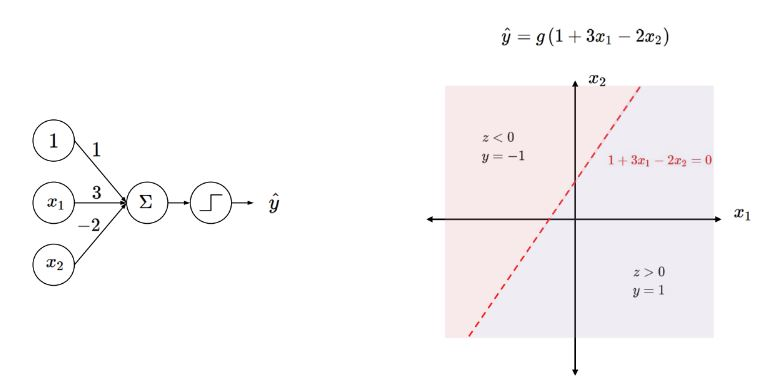 <br/>
 source: prof. seungchul lee's lecture note (POSTECH)

### **2.2. micro perspective: multi-layer perceptron(MLP) = artificial neural network(ANN)**

* **XOR problem** <br/>

 Minsky-Papert controversy on XOR <br/>

 $\Rightarrow$ not linearly seperable <br/>

 $\Rightarrow$ limitation of perceptron <br/>

 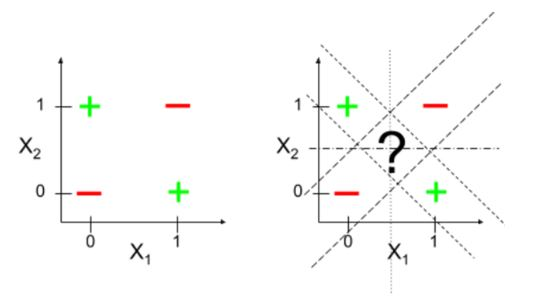 <br/>
 source: prof. seungchul lee's lecture note (POSTECH)

* **MLP structure** <br/>

 **step 1**: multi-neurons <br/>

 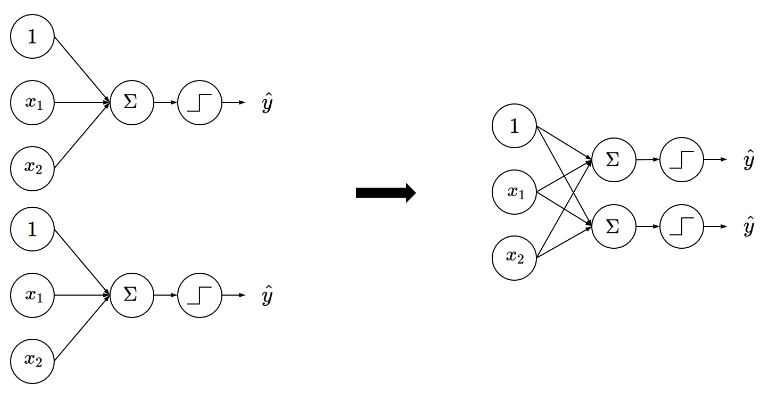 <br/>

  **step 2**: differentiable activation function <br/>

 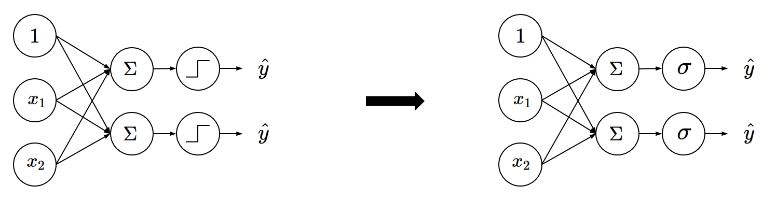 <br/>

  **step 3**: compact form <br/>

 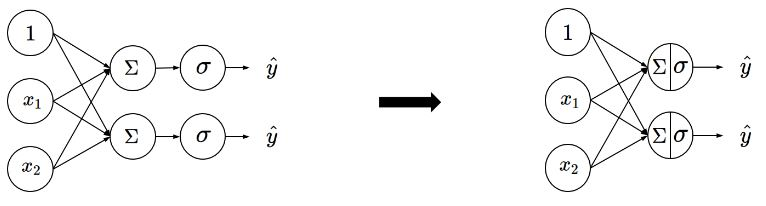 <br/>

 **step 4**: multi-layer perceptron <br/>
 
 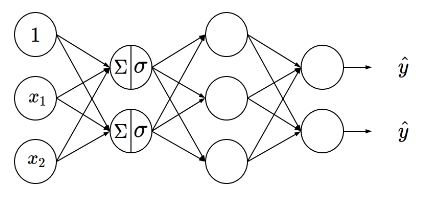 <br/>
 source: prof. seungchul lee's lecture note (POSTECH) <br/>

* **activation function** <br/>

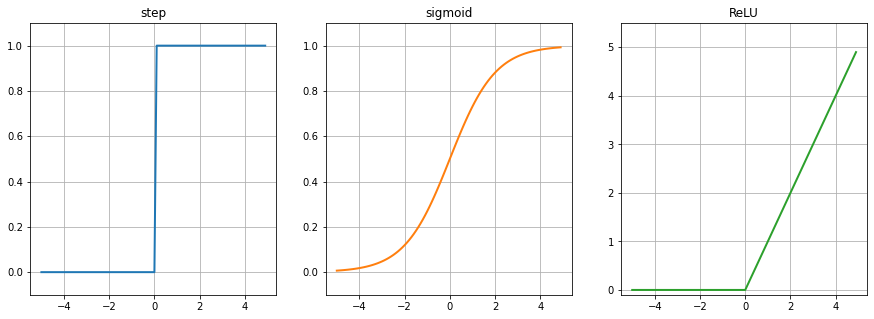

In [4]:
plt.figure(figsize=(15, 5))

color_seq = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.subplot(1, 3, 1)

def step(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step(x)
plt.plot(x, y, '-', color=color_seq[0], linewidth=2.0)
plt.ylim(-0.1, 1.1)
plt.title('step')
plt.grid(True)

plt.subplot(1, 3, 2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y = sigmoid(x)
plt.plot(x, y, '-', color=color_seq[1], linewidth=2.0)
plt.ylim(-0.1, 1.1)
plt.title('sigmoid')
plt.grid(True)

plt.subplot(1, 3, 3)

def relu(x):
    return np.maximum(0, x)

y = relu(x)
plt.plot(x, y, '-', color=color_seq[2], linewidth=2.0)
plt.ylim(-0.1, 5.5)
plt.title('ReLU')
plt.grid(True)

plt.show()

### **2.3. macro perspective: ANN as kernel learning**

* **kernel learning** <br/>

 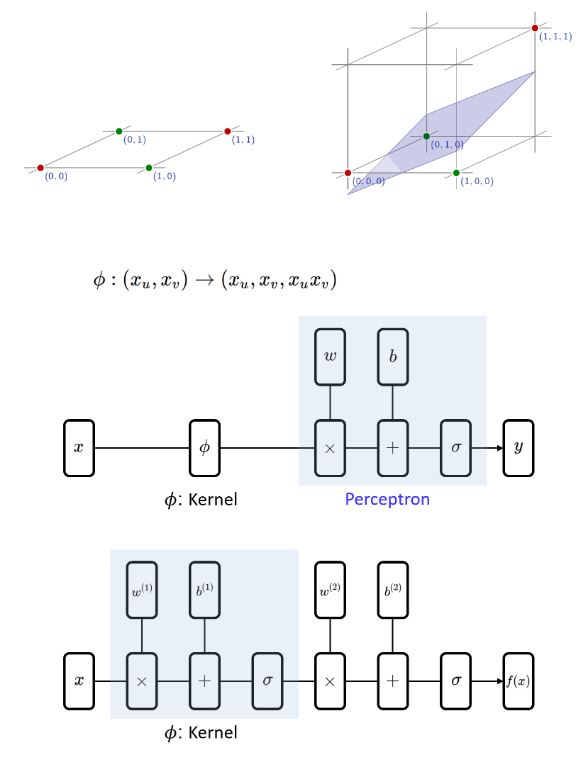 <br/>
 source: prof. seungchul lee's lecture note (POSTECH) <br/>

* [kernel 3d visualization](https://www.youtube.com/watch?v=OdlNM96sHio) <br/>

### **2.4. DNN structure**

* **complex / nonlinear universal function approximator** <br/>

 maping of maping <br/>

 feature of feature <br/>

 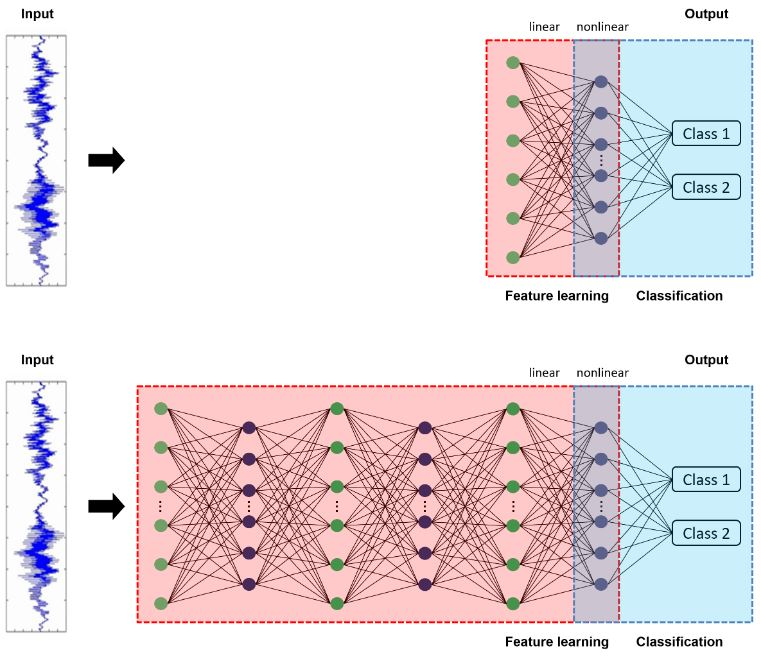 <br/>
 source: prof. seungchul lee's lecture note (POSTECH) <br/>

* **CNN structure** <br/>
 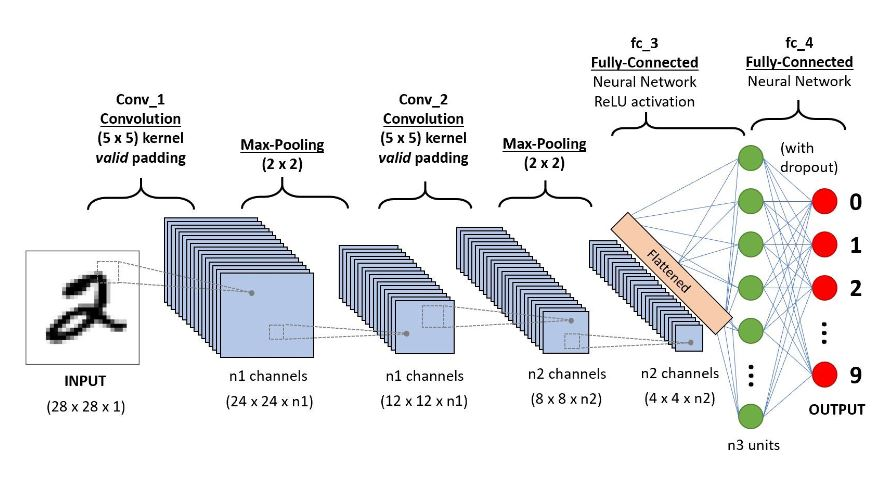 <br/>
  source: CMU(11-785, spring 2021) <br/>

In [5]:
%%html
<iframe src="https://www.youtube.com/embed/aircAruvnKk?rel=0" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

### **2.5. DNN training: pipeline**

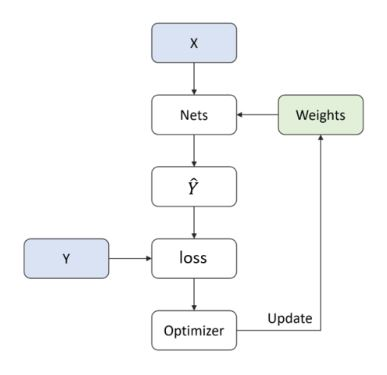 <br/>
 source: prof. seungchul lee's lecture note (POSTECH) <br/>

### **2.6. DNN training: optimization**

learning or estimating **weights** and **biases** of MLP from training data <br/> <br/>

* **optimization problem** <br/>

 $min_{\omega}\;f(\omega)$ <br/>

 s.t. $g_{i}(\omega)\geq 0$ <br/> <br/>

 **3 key components** <br/>

 (1) objective function $f(\cdot)$ <br/>
 (2) decision variable or unknwon $\omega$ <br/>
 (3) constraints $g(\cdot)$ <br/>

### **2.7. DNN training: loss function**

* **error between** **target values** and **predictions** <br/>

 $min_{\omega}\sum^{m}_{i=1}\ell\Big(h_{\omega}(x^{(i)}),\;y^{(i)}\Big)$ <br/> <br/>

* **example** <br/>

 (1) squared loss(for regression) <br/>

 $\;\;\;\;$ $\Rightarrow$ $\frac{1}{m}\sum^{m}_{i=1}\Big(h_{\omega}(x^{(i)})-y^{(i)}\Big)^{2}$ <br/> <br/>

 (2) cross entropy(for classification) <br/>

 $\;\;\;\;$ $\Rightarrow$ $-\frac{1}{m}\sum^{m}_{i=1}y^{(i)}\cdot log\big(h_{\omega}(x^{(i)}\big)+\big(1-y^{(i)}\big)\cdot log\big(1-(h_{\omega}(x^{(i)})\big)$ <br/>

### **2.8. DNN training: gradient descent(GD)**

* **batch gradient descent** <br/>

 full training data <br/>

 $\;\;\;\;\;$ $\varepsilon(\omega)=\frac{1}{m}\sum^{m}_{i=1}\ell\Big(\hat{y}^{(i)},\;y^{(i)}\Big)=\frac{1}{m}\sum^{m}_{i=1}\ell\Big(h_{\omega}(x^{(i)}),\;y^{(i)}\Big)$ <br/>

 $\;\;\;\;\;$ $\Rightarrow$ $\nabla_{\omega}\varepsilon=\nabla_{\omega}\frac{1}{m}\sum^{m}_{i=1}\ell\Big(h_{\omega}(x^{(i)}),\;y^{(i)}\Big)=\frac{1}{m}\sum^{m}_{i=1}\frac{\partial}{\partial\omega}\ell\Big(h_{\omega}(x^{(i)}),\;y^{(i)}\Big)$ (by linearity) <br/>

 $\;\;\;\;\;$ $\Rightarrow$ $\omega\longleftarrow\omega-\alpha\nabla_{\omega}\varepsilon$ <br/>
 
 $\;\;\;\;\;$ $\Rightarrow$ computationally burden! <br/> <br/>

* **stochastic gradient descent** <br/>

 randomly selected single training data<br/>

 $\;\;\;\;\;$ $\ell\Big(\hat{y}^{(i)},\;y^{(i)}\Big)=\ell\Big(h_{\omega}(x^{(i)}),\;y^{(i)}\Big)=\ell^{(i)}$ <br/>

 $\;\;\;\;\;$ $\Rightarrow$ $\omega\longleftarrow\omega-\alpha\nabla_{\omega}\ell^{(i)}$ <br/>

 $\;\;\;\;\;$ $\Rightarrow$ $\mathbb{E}\Big[\frac{\partial\ell^{(i)}}{\partial\omega}\Big]=\frac{1}{m}\sum^{m}_{i=1}\frac{\partial\ell^{(i)}}{\partial\omega}=\frac{\partial}{\partial\omega}\Big[\frac{1}{m}\sum^{m}_{i=1}\ell^{(i)}\Big]=\frac{\partial\varepsilon}{\partial\omega}$ <br/>

 $\;\;\;\;\;$ $\Rightarrow$ **stochastic GD** is unbaised estimator of the **batch GD**! <br/> <br/>

* **mini-batch gradient descent$(s<m)$** <br/>

 $\;\;\;\;\;$ $\varepsilon(\omega)=\frac{1}{s}\sum^{s}_{i=1}\ell\Big(\hat{y}^{(i)},\;y^{(i)}\Big)=\frac{1}{s}\sum^{s}_{i=1}\ell\Big(h_{\omega}(x^{(i)}),\;y^{(i)}\Big)$ <br/>

 $\;\;\;\;\;$, where <br/>

 $\;\;\;\;\;$ $s$: hyper-parameter <br/>

 $\;\;\;\;\;$ $\Rightarrow$ $\omega\longleftarrow\omega-\alpha\nabla_{\omega}\varepsilon$ <br/>

 $\;\;\;\;\;$ $var\Big[\frac{1}{s}\sum^{s}_{i=1}\frac{\partial\ell^{(i)}}{\partial\omega}\Big]=\frac{1}{s^{2}}var\Big[\sum^{s}_{i=1}\frac{\partial\ell^{(i)}}{\partial\omega}\Big]\frac{1}{s}var\Big[\frac{\partial\ell^{(i)}}{\partial\omega}\Big]$ <br/>

 $\;\;\;\;\;$ $\Rightarrow$ tradeoff exists! <br/>

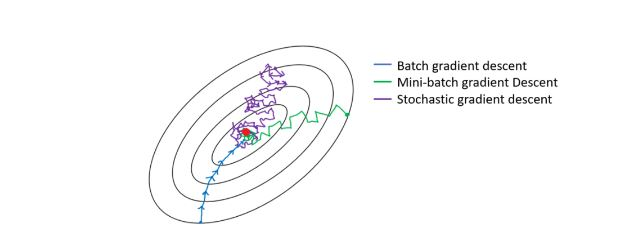 <br/>
$\;\;\;\;\;\;\;\;\;\;\;\;$ source: prof. seungcheol lee's lecture note(POSTECH) <br/> 

* **update rule for $\omega$** <br/>

 **repeat**: $\omega\longleftarrow\omega-\alpha\nabla_{\omega}\ell\Big(h_{\omega}(x^{(i)}),\;y^{(i)}\Big)$ for some step size(learning rate) $\alpha>0$ <br/> <br/>

 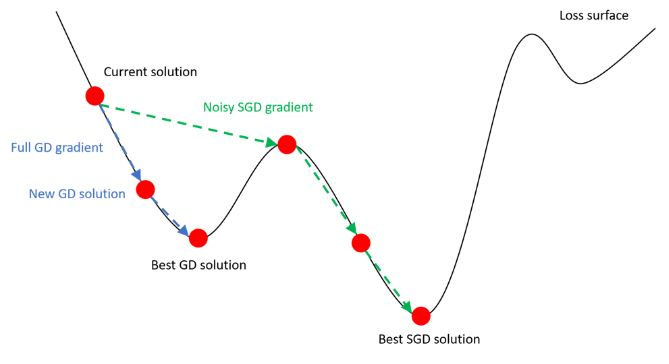 <br/>
 source: prof. seungchul lee's lecture note (POSTECH) <br/> <br/>

 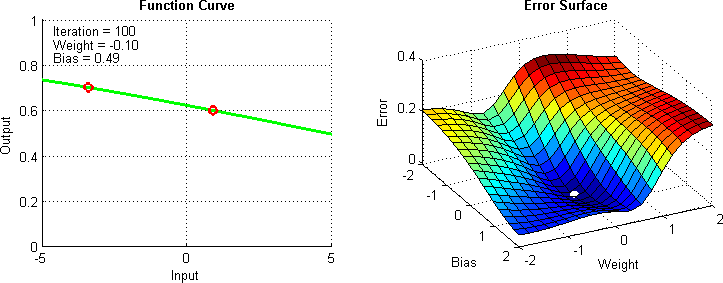 <br/>
 source: https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-gradient-descent-fcd5e0fc077d <br/>

* **problem** <br/> <br/>

 learning rate$(\alpha)$ <br/>

 **small $\alpha$** converges slowly and gets stuck in the false local minima. <br/>

 **large $\alpha$** overshoots and diverges. <br/> <br/>

 (1) spatial issue <br/>

 **assumption**: fixed $\alpha$ to all features <br/> <br/>

 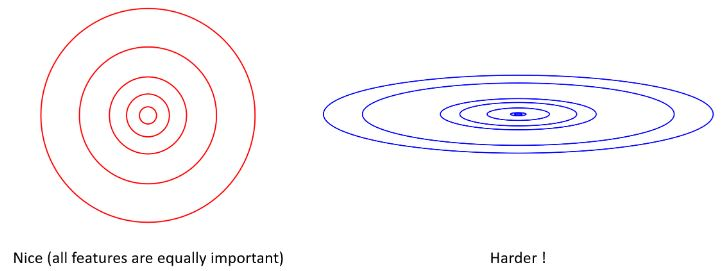 <br/>
 source: dr. Francois Fleuret at EPFI <br/> <br/>

 (2) temporal issue <br/>

 gradually decay $\alpha$ to reduce the fluctuations <br/>

* **solution: adaptive learning rate method** <br/> <br/>

 $\omega_{t+1,i}=\omega_{t,i}-\frac{\alpha}{\sqrt{G_{t,ii}}+\epsilon}\cdot g_{t,i}$ <br/> <br/>

 , where <br/>

 $G_{t,ii}$: sum of the squared of the gradients <br/>

 $\Rightarrow$ Momentum(Quian et al., 1999), Adagrad(Duchi et al., 2011), Adadelta(Zeiler et al., 2012), **Adam**(Kingma et al., 2014) <br/>

 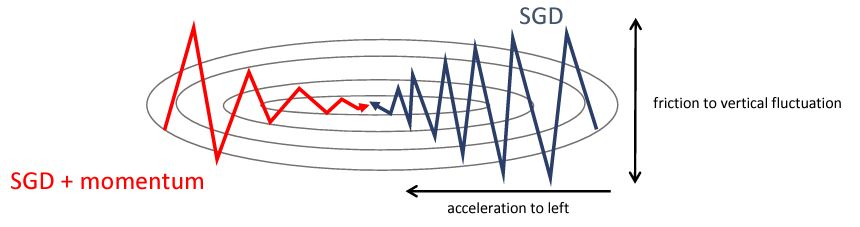 <br/>
 source: prof. jinwoo shin's lecture note(KAIST) <br/>

### **2.9. backpropagation**

* **recursive algorithm** <br/>

 using gradient descent, <br/>

 learning weights and biases requires too many computations for all $\omega$. <br/>

 $\Rightarrow$ we use the **backpropagation** method based the **dynamic programming**. <br/>

 $\;\;\;\;$ **DP** $\approx$ **recursion** + **memorization** <br/>

 $\Rightarrow$ update weights and biases **recursively** with **memory**! <br/>

 $\;\;\;\;$ 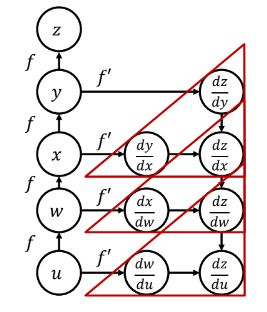 <br/>
$\;\;\;\;$ source: prof. seungchul lee's lecture note (POSTECH) <br/>

### **2.10. MNIST example**

In [6]:
# ====================================================================================================
# ANN MNIST
# ====================================================================================================
# import library

from calendar import EPOCH
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# ----------------------------------------------------------------------------------------------------
# generate MNIST data set

mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

train_x.shape
train_y.shape

test_x.shape
test_y.shape
# ----------------------------------------------------------------------------------------------------
# ANN with TensorFlow


class ANN:

    def __init__(self, idx, l1_n_unit, l2_n_unit, n_batch, n_epoch, LR):

        self.idx = idx
        self.l1_n_unit = l1_n_unit
        self.l2_n_unit = l2_n_unit
        self.n_batch = n_batch
        self.n_epoch = n_epoch
        self.LR = LR

    def img_output(self):

        test_img = np.reshape(test_x[self.idx], (28, 28))
        # img = test_x[5].reshape(28, 28)

        plt.figure(figsize=(6, 6))
        plt.imshow(test_img.reshape(28, 28), 'gray')
        plt.xticks([])
        plt.yticks([])

        fig1 = plt.show()

        return fig1

    def ANN_TensorFlow(self):

        model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(units=self.l1_n_unit, activation='relu'),
            tf.keras.layers.Dense(units=self.l2_n_unit, activation='softmax')
        ])

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.LR), loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # train model
        loss = model.fit(train_x, train_y,
                         batch_size=self.n_batch, epochs=self.n_epoch)

        # evaluate test data(out-of-sample)
        test_loss, test_acc = model.evaluate(test_x, test_y)

        test_img = np.expand_dims(test_x[self.idx], axis=0)
        # test_img = test_x[np.random.choice(test_x.shape[0], 1)]

        predict = model.predict_on_batch(test_img)
        predict_value = np.argmax(predict, axis=1)

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(test_img.reshape(28, 28), 'gray')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.stem(predict[0])

        fig2 = plt.show()

        result = print('prediction : {}'.format(predict_value[0]))

        return fig2, result


MNIST_instance = [ANN(1597, 100, 10, 50, 10, 0.01),
                  ANN(2362, 100, 10, 50, 10, 0.05),
                  ANN(4963, 100, 10, 50, 10, 0.1)]
# ====================================================================================================

Epoch 1/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.2236 - accuracy: 0.9327
Epoch 2/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1403 - accuracy: 0.9592: 0s
Epoch 3/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1189 - accuracy: 0.9662
Epoch 4/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1124 - accuracy: 0.9688
Epoch 5/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1025 - accuracy: 0.9710
Epoch 6/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0947 - accuracy: 0.9732
Epoch 7/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0913 - accuracy: 0.9752
Epoch 8/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0859 - accuracy: 0.9754
Epoch 9/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0865 - accuracy: 0.9770
Epoch 10/10
313/313 [==============================] - 0s 905us/step - loss: 0

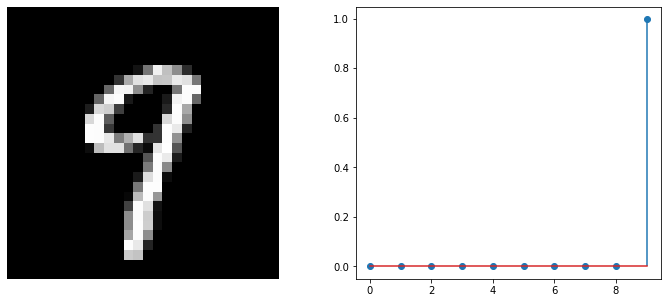

prediction : 9


(None, None)

In [7]:
MNIST_instance[0].ANN_TensorFlow()

## **3. one-agent consumption-saving model with a borrowing constraint**

### **3.1. model**

### **3.1.1. model 1(default)** <br/>

* **baseline problem** <br/> <br/>

  $max_{\{{c_{t}, w_{t+1}}\}^{\infty}_{t=0}}\,E_{0}\Big[\sum^{\infty}_{t=0}\beta^{t}u(c_{t})\Big]$ <br/> <br/>

  $s.t.$ $w_{t+1}=(w_{t}-c_{t})\bar{r}+e^{y_{t}}$ <br/> <br/>

  $\;\;\;\;\;\;\;c_{t}\leq w_{t}\Rightarrow$ WLOG, no borrowing limit <br/> <br/>

  $c_{t},\;w_{t+1}$: control variable <br/> 
  
  $w_{t}$: state variable <br/> <br/>

  , where <br/>

  $u(c_{t})=\frac{c^{1-\gamma}-1}{1-\gamma}$: strictly increasing and concave utility function, <br/>

  $\gamma$: risk-aversion coefficient <br/>

  $\beta\in$[0, 1): subjective discount factor <br/>

  $c_{t}$: consumption <br/>
  
  $w_{t}$: cash-on-hand <br/>

  $w_{0}$: initial condition(given) <br/>
  
  $w\sim$ uniform[$w_{1}, w_{2}$] <br/>
  
  $\bar{r}\in\Big(0, \frac{1}{\beta}\Big)$: (gross) constant interest rate <br/> <br/>
  
* **exogenous income shock following AR(1)** <br/>

  $y_{t+1}=\rho y_{t}+\sigma\epsilon_{t}$ <br/> 

  , where <br/>
  
  $\epsilon_{t}\sim \mathcal{N}(0,\,1)$, $\lvert \rho \rvert<1$, $\sigma>0$  <br/> <br/>

* **calibration** <br/>

|**parameter**|$\beta$|$\gamma$|$\bar{r}$|$\sigma$|
|-------------|-----|-----|-----|-----|
|**value**|0.9|2.0|1.04|0.9|0.1|

### **3.1.2. model 2(multiple shocks)** <br/>

* **baseline problem** <br/> <br/>

  $ max_{\{{c_{t}, w_{t+1}}\}^{\infty}_{t=0}}\,E_{0}\Big[\sum^{\infty}_{t=0}exp(\delta_{t})\beta^{t}u(c_{t})\Big] $ <br/> <br/>

  $ s.t. w_{t+1}=(w_{t}-c_{t})\bar{r}exp(r_{t+1})+exp(y_{t+1}) $ <br/>
  
  $ \;\;\;\;\;\;\; c_{t}\leq w_{t} $ <br/> <br/>

  $c_{t},\;w_{t+1}$: control variable <br/> 
  
  $w_{t}$: endogenous state variable <br/> 
  
  $p_{t}, q_{t}, r_{t}, \delta_{t}$: exogenous state variables <br/> <br/>

  , where <br/>

  $u(c_{t})=\frac{c^{1-\gamma}-1}{1-\gamma}$: strictly increasing and concave utility function, <br/>

  $\gamma$: risk-aversion coefficient <br/>

  $\beta\in[0, 1)$: subjective discount factor <br/>

  $c_{t}$: consumption <br/>

  $w_{t}$: beggining of period cash on hand <br/>

  $z_{t}\equiv \{p_{t}, q_{t}, r_{t}, \delta_{t}\}$: a vector of exogenous state variables <br/>

  $w_{0}, z_{0}$: initial condition(given) <br/>

  $y_{t}=exp(p_{t})\cdot exp(q_{t})$: total income <br/>

  $p_{t}$: permanent income <br/>

  $q_{t}$: transitory income <br/>

  $\bar{r}\in\Big(0, \frac{1}{\beta}\Big)$: (gross) constant interest rate <br/>

  $\delta_{t}$: (preference) discount factor <br/> <br/>

* **exogenous state variables shock following AR(1)** <br/> <br/>

  $p_{t+1}=\rho_{y} p_{t}+\sigma_{p}\epsilon^{p}_{t+1}$ <br/>
   
  $q_{t+1}=\rho_{y} q_{t}+\sigma_{q}\epsilon^{q}_{t+1}$ <br/>

  $r_{t+1}=\rho_{r} r_{t}+\sigma_{r}\epsilon^{r}_{t+1}$ <br/>

  $\delta_{t+1}=\rho_{\delta} \delta_{t}+\sigma_{\delta}\epsilon^{\delta}_{t+1}$ <br/>

  , where <br/>
   
  $\epsilon^{i}_{t}\sim \mathcal{N}(0,\,1)$, $\lvert \rho \rvert<1$, $\sigma>0$ <br/> <br/>

* **calibration** <br/>

|**parameter**|$\beta$|$\gamma$|$\bar{r}$|$\rho_{p}$|$\sigma_{p}$|$\rho_{q}$|$\sigma_{q}$|$\rho_{r}$|$\sigma_{r}$|$\rho_{\delta}$|$\sigma_{\delta}$|
|-------------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|**value**|0.9|2.0|1.04|0.999|0.001|0.9|0.1|0.2|0.001|0.9|0.01|

In [8]:
# model parameters

beta = 0.9 
gamma = 2.0 
sigma = 0.1  
rho = 0.9

sigma_p = 0.0001
rho_p = 0.999

sigma_q = 0.001
rho_q = 0.9

sigma_r = 0.001
rho_r = 0.2

sigma_delta = 0.001
rho_delta = 0.2

rbar = 1.04

### **3.2. stocahstic solution domain**

our **DL framework** converts a **dynamic stochastic model** into a **static optimization problem**. <br/>

$\Rightarrow$ we will solve the **static problem** on a **random grid of points** which are drawn from the following **5-dimensional domain**. <br/> <br/>

* **exogenous state variables** <br/>

 $p,\;q,\;r,\;\delta$ (drawn) $\,\sim\,ergodic$ distribution <br/>

 , where <br/> 

 $ergodic$ distribution $\sim\,N(0,\,\sigma^{2}_{z})$ <br/>

 AR(1) process $z$ with $\rho$(autocorrelation) and $\sigma$(conditional std. dev.) <br/>
 
 $\sigma_{z}=\frac{\sigma}{\sqrt{1-\rho^{2}}}$ <br/> <br/>

* **endogenous state variable** <br/>

 $w$ (drawn) $\,\sim\,uniform$ distribution within inverval: $w\in[w_{min},\,w_{max}]$ <br/>

In [9]:
# std.dev. for ergodic(normal) distributions of exogenous state variables
sigma_e_r = sigma_r/(1-rho_r**2)**0.5
sigma_e_p = sigma_p/(1-rho_p**2)**0.5
sigma_e_q = sigma_q/(1-rho_q**2)**0.5
sigma_e_delta = sigma_delta/(1-rho_delta**2)**0.5

# bounds for endogenous state variable
w_min = 0.1
w_max = 4.0

* **Kuhn-Tucker(KT) conditions** <br/>

 in the recursive form, the solution can be characterized by the **KT conditions**. <br/>

 $\Rightarrow$ $a\geq0,\;b\geq0$ and $ab=0$ <br/>

 $\;\;\;\;\;$, where <br/>

 $\;\;\;\;\;$ $a\equiv w-c$ (share of saving) <br/>

 $\;\;\;\;\;$ $b\equiv u^{'}(c)-\beta\bar{r}E_{\epsilon}\bigg[u^{'}(c^{'})exp(\delta^{'}-\delta+r^{'})\bigg]$ (Lagrange multiplier) <br/>

 $\;\;\;\;\;$ (in the absence of borrowing constraint $b=0$, the **KT conditions** lead to the familiar **Euler equation**.) <br/> <br/>

 but **inequality constraints** are not directly compatible with the **DL framework** in this paper. <br/>

 $\Rightarrow$ we need to reformulate the **KT conditions** as a set of equations that hold with **equality**.

 $\Rightarrow$ we use a **smooth representation** of the **KT conditions**, called the **Fischer-Burmeister(FB)** function, which is differentiable. <br/>

 $\;\;\;\;\;$ $\Psi_{FB}(a,b)=a+b-\sqrt{a^{2}+b^{2}}=0$ <br/>

 $\Rightarrow$ the **restriction** $\Psi_{FB}(a,b)=0$ is equivalent to the **KT conditions**. <br/>

 $\;\;\;\;\;$ $\Psi_{FB}(a,b)=0\;\Leftrightarrow\;$**KT conditions** <br/>

 $\Rightarrow$ we rewrite the $\Psi_{FB}$ function in unit-free form. <br/>

 $\;\;\;\;\;$ $\Psi_{FB}(1-\zeta, 1-h)=(1-\zeta)+(1-h)-\sqrt{(1-\zeta)^{2}+(1-h)^{2}}=0$ <br/>

 $\;\;\;\;\;$, where <br/>

 $\;\;\;\;\;$ $\zeta\equiv\frac{c}{w}$ (consumption ratio) <br/>

 $\;\;\;\;\;$ $h\equiv\beta\bar{r}E_{\epsilon}\bigg[\frac{u^{'}(c^{'})}{u^{'}(c)}exp(\delta^{'}-\delta+r^{'})\bigg]$ (normalized Lagrange multiplier) <br/>

 $\Rightarrow$ $\zeta\in[0,1]$ (convenient domain for defining NN) <br/>
 
 $\;\;\;\;\;$ $h>0$ (normalized to be around 1) <br/>

In [10]:
# Fischer-Burmeister (FB) in TensorFlow

min_FB = lambda a,b: a+b-tf.sqrt(a**2+b**2)

### **3.3. parameterizing decision functions with neural network**

there are many different **decision functions** that we can approximate for characterizing the solution. <br/>

$\Rightarrow$ we chose to approximate the **two functions** like below. <br/>

$\;\;\;\;\;$ (1) $\zeta\equiv\frac{c}{w}$ (consumption ratio) <br/>

$\;\;\;\;\;$ (2) $h\equiv\beta\bar{r}E_{\epsilon}\bigg[\frac{u^{'}(c^{'})}{u^{'}(c)}exp(\delta^{'}-\delta+r^{'})\bigg]$ (normalized Lagrange multiplier) <br/>

$\Rightarrow$  since model is **stationary**, we look for a **decision rule**. <br/>

* **decision rule** <br/>

 $\begin{pmatrix} \zeta \\ h \end{pmatrix}=\varphi(s;\theta)$ <br/>

 , where <br/>

 $s=(r,\,\delta,\,p,\,q,\,w)$: 5-dimensional state space <br/>

 $\varphi(\cdot)$: decision function <br/> <br/>
 
* **approximating the decision rule** <br/>

 we approximate an unknown function $\varphi$ using some flexible function family $\varphi(\cdot;\theta)$ parameterized by a vector of coefficients $\theta$. <br/>

 $\Rightarrow$ polynomial (conventional) / **Neural Network** (special) <br/>

 $\Rightarrow$ NN has a **nonlinear dependence** of the approximation function on the coefficients $\theta$. <br/>

 * **module**: TensorFlow 2.8 keras <br/>
 * **model structue**: MLP(32$\times$32$\times$32$\times$2) with linear outputs <br/>
 * **activation function**: ReLU <br/>
 

In [11]:
# construction of neural network

layers = [tf.keras.layers.Dense(32, activation='relu', input_dim=5, bias_initializer='he_uniform'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(2, activation=tf.keras.activations.linear)]
          
perceptron = tf.keras.Sequential(layers)

In [12]:
# graphviz

tf.keras.utils.plot_model(perceptron, to_file='model.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


* **nonlineaer decision function** <br/> <br/>

 we create the **decision rule** like below. <br/> <br/>

 $\varphi(s;\theta)=\begin{pmatrix} \zeta \\ h \end{pmatrix}$ <br/> <br/>

 **input**: 5 vectors of size $n$ for the states $r,\;\delta,\;q,\;p,\;w$ <br/>

 **output**: 2 vectors of size $n$ for $\zeta,\;h$ <br/> <br/>

 , where <br/>

 $s=(r,\,\delta,\,p,\,q,\,w)$ <br/>

 $\zeta=\frac{1}{1+e^{-\mathcal{N}_{1}(s;\theta)}}\in[0,1]$ $\rightarrow$ sigmoid(logistic) <br/>

 $h=exp(\mathcal{N}_{2}(S;\theta))>0$ $\rightarrow$ exponential <br/>

 $\mathcal{N}_{1},\;\mathcal{N}_{2}$: 1st and 2nd component of NN output <br/>

In [13]:
def dr(r: Vector, delta: Vector, q: Vector, p: Vector, w: Vector)->Tuple[Vector, Vector]:

    # we normalize exogenous state variables by their 2 standard deviations 
    # so that they are typically between -1 and 1 
    r = r/sigma_e_r/2
    delta = delta/sigma_e_delta/2
    q = q/sigma_e_q/2
    p = p/sigma_e_p/2
    
    # we normalze income to be between -1 and 1
    w = (w-w_min)/(w_max-w_min)*2.0-1.0

    # we prepare input to the perceptron
    s = tf.concat([_e[:,None] for _e in [r,delta,q,p,w]], axis=1) # equivalent to np.column_stack

    x = perceptron(s) # n x 2 matrix 

    # consumption share is always in [0,1]
    zeta = tf.sigmoid(x[:,0])
    
    # expectation of marginal consumption is always positive
    h = tf.exp(x[:,1])
    
    return (zeta, h)

* **initial guess of decision rule against $w$** <br/>

 note that coefficients of the perceptron are initialized with random values.

In [14]:
w_vec = np.linspace(w_min, w_max, 100)

# r, p, q, delta are zero-mean
zeta_vec, h_vec = dr(w_vec*0, w_vec*0, w_vec*0, w_vec*0, w_vec)

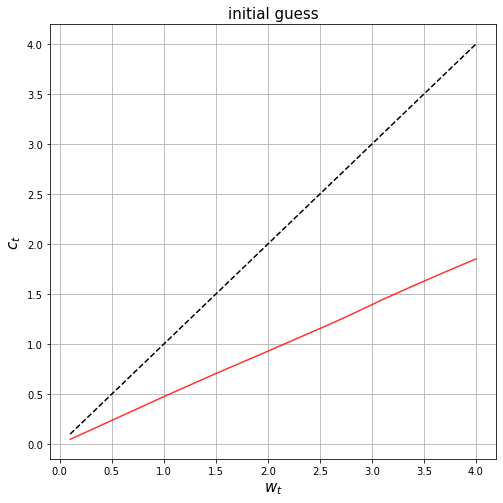

In [15]:
plt.figure(figsize=(8, 8))

plt.plot(w_vec, w_vec, linestyle='--', color='black')
plt.plot(w_vec, w_vec*zeta_vec, color='red', alpha=0.8)
plt.xlabel('$w_t$', fontsize=15)
plt.ylabel('$c_t$', fontsize=15)
plt.title('initial guess', fontsize=15)
plt.grid()

plt.show()

### **3.4. residuals in the model's equations**

let identify the **unknown decision functions** for $\zeta$ and $h$. <br/>

$\Rightarrow$ we need to use **two equations** like below. <br/>

$\;\;\;\;\;$ (1) **normalized lagrange multiplier** <br/>

$\;\;\;\;\;\;\;\;\;\;$ $h=\beta\bar{r}E_{\epsilon}\bigg[\frac{u^{'}(c^{'})}{u^{'}(c)}exp(\delta^{'}-\delta+r^{'})\bigg]$ <br/>

$\;\;\;\;\;$ (2) **FB function representing the KT conditions** <br/>

$\;\;\;\;\;\;\;\;\;\;$ $\Psi_{FB}(1-\zeta, 1-h)=(1-\zeta)+(1-h)-\sqrt{(1-\zeta)^{2}+(1-h)^{2}}=0$ <br/>

$\;\;\;\;\;$, where <br/>

$\;\;\;\;\;$ $\epsilon^{'}=(\epsilon^{'}_{r},\;\epsilon^{'}_{\delta},\;\epsilon^{'}_{q},\;\epsilon^{'}_{p})$ <br/>

$\Rightarrow$ we don't need to include $\zeta=\frac{c}{w}$ because we will impose it to hold exactly in the solution by setting $c=w\zeta$ and $c^{'}=w^{'}\zeta^{'}$.

$\Rightarrow$ we construct the residuals in the above **two equations** which we will minimize. <br/>

$\;\;\;\;\;$ given vectors of **current state** $s=(r,\,\delta,\,q,\,p,\,w)$, <br/>

$\;\;\;\;\;$ using **next-period shock** $\epsilon^{'}$, we can compute **realized residuals** like below. <br/>

$\;\;\;\;\;$ $R_{1}(s,\epsilon^{'})=\beta\bar{r}\frac{u^{'}(c^{'})}{u^{'}(c)}exp(\delta^{'}-\delta+r^{'})-h$ <br/>

$\;\;\;\;\;$ $R_{2}(s)=\Psi_{FB}(1-\zeta,1-h)$ <br/>

$\;\;\;\;\;$, where <br/>

$\;\;\;\;\;$ $w^{'}=(w-c)\bar{r}exp(r)+exp(y)$ (transition equation) <br/>

In [16]:
def Residuals(e_r: Vector, e_delta: Vector, e_q: Vector, e_p: Vector, r: Vector, delta: Vector, q: Vector, p: Vector, w: Vector):

    # all inputs are expected to have the same size n
    n = tf.size(r)

    # arguments correspond to the values of the states today
    zeta, h = dr(r, delta, q, p, w)
    c = zeta*w

    # transitions of the exogenous processes
    r_next = r*rho_r + e_r
    delta_next = delta*rho_delta + e_delta
    p_next = p*rho_p + e_p
    q_next = q*rho_q + e_q
    # (epsilon = (r_next, delta_next, p_next, q_next))
    
    # transition of endogenous states (next denotes variables at t+1)
    w_next = tf.exp(p_next)*tf.exp(q_next) + (w-c)*rbar*tf.exp(r_next)

    zeta_next, h_next = dr(r_next, delta_next, q_next, p_next, w_next)
    cnext = zeta_next*w_next


    R1 = beta*tf.exp(delta_next-delta)*(cnext/c)**(-gamma)*rbar*tf.exp(r_next) - h
    R2 = min_FB(1-h,1-zeta)

    return (R1, R2)

### **3.5. expected squared sum of residuals**

we construct the **objective function** for **minimization**. <br/>

$\Rightarrow$ **squared sum of two residuals** in the two model's equations on a given 5-dimesional domain <br/>

$\;\;\;\;\;$ $\Xi(\theta)=E_{s}\Bigg[\bigg(E_{\epsilon}\Big[R_{1}(s,\epsilon^{'})\Big]\bigg)^{2}+v\bigg(R_{2}(s)\bigg)^{2}\Bigg]$ <br/>

$\;\;\;\;\;$, where <br/>

$\;\;\;\;\;$ $v$: exogenous relative weights of the two residuals <br/>

$\;\;\;\;\;$ $R_{1}(s,\epsilon^{'})$: the first residual under the expectation operator $E_{\epsilon}$ across next-period shocks $\epsilon^{'}=(\epsilon^{'}_{r},\;\epsilon^{'}_{\delta},\;\epsilon^{'}_{q},\;\epsilon^{'}_{p})$ <br/>

$\;\;\;\;\;$ $R_{2}(s)$: the second residual which does not include random variables <br/>

$\;\;\;\;\;$ $\begin{pmatrix} \zeta \\ h \end{pmatrix}=\varphi(s;\theta)$ <br/>

$\Rightarrow$ but it requires a potentially costly evaluation of **two nested expectation operators** for each random grid point $s=(r,\,\delta,\,q,\,p,\,w)$. <br/>

$\Rightarrow$ we need to construct a seperate approximation of the expectation function $E_{\epsilon}\Big[R_{1}(s,\epsilon^{'})\Big]$ by considering a potentially large number of <br/> 
$\;\;\;\;\;$ next period shocks $\epsilon^{'}=(\epsilon^{'}_{r},\;\epsilon^{'}_{\delta},\;\epsilon^{'}_{q},\;\epsilon^{'}_{p})$. <br/>

$\Rightarrow$ computationally burden! <br/>

### **3.6. AiO(all-in-one) expectation operator**

**MMW(2021)** introduce an **all-in-one expectation operator** that makes it possible to merge the **two expectation operators** into a **single one**. <br/>

**note**. $E[a]^{2}=E[a]E[b]=E[ab]$ <br/>

$\;\;\;\;\;\;\;\;$, where <br/>

$\;\;\;\;\;\;\;\;$ $a$ and $b$ are independent and follow the same distribution. <br/>

$\Rightarrow$ we replace $\Big(E_{\epsilon}\Big[R_{1}(s,\epsilon^{'})\Big]\Big)^{2}$ by the product of two residuals constructed by using two uncorrelated random draws $\epsilon^{'}_{1}$ and $\epsilon^{'}_{2}$. <br/>

$\;\;\;\;\;$ $E_{\epsilon_{1}}\Big[R_{1}(s,\epsilon^{'}_{1})\Big]\cdot E_{\epsilon_{2}}\Big[R_{1}(s,\epsilon^{'}_{2})\Big]=E_{\epsilon_{1},\,\epsilon_{2}}\Big[R_{1}(s,\epsilon^{'}_{1})\cdot R_{1}(s,\epsilon^{'}_{2})\Big]$ <br/>

$\Rightarrow$ we can rewrite the objective function as **one expectation operator** like below. <br/>

$\;\;\;\;\;$ $\Xi(\theta)=E_{s,\,\epsilon_{1},\,\epsilon_{2}}\Bigg[R_{1}(s,\epsilon^{'}_{1})\cdot R_{1}(s,\epsilon^{'}_{2})+v\big(R_{2}(s)\big)^{2}\Bigg]\equiv E_{\omega}\Big[\xi(\omega;\theta)\Big]$ <br/>

$\;\;\;\;\;$, where $\omega=(s,\,\epsilon^{'}_{1},\,\epsilon^{'}_{2})$: vector-value random variable <br/>

$\Rightarrow$ we approximate $\Xi(\theta)$ by using **Monte Carlo simulation**. <br/>

$\;\;\;\;\;$ we draw $n$ random draws of $\omega$ and compute the average of the objective function. <br/>

$\;\;\;\;\;$ $\Xi(\theta)\approx\Xi^{n}(\theta)=\frac{1}{n}\sum^{n}_{i=1}\xi(\omega_{i};\theta)$ <br/>

In [17]:
def Xi(n): # objective function for DL training

    # randomly drawing current states
    r = tf.random.normal(shape=(n,), stddev=sigma_e_r)
    delta = tf.random.normal(shape=(n,), stddev=sigma_e_delta)
    p = tf.random.normal(shape=(n,), stddev=sigma_e_p)
    q = tf.random.normal(shape=(n,), stddev=sigma_e_q)
    w = tf.random.uniform(shape=(n,), minval=w_min, maxval=w_max)
 
    # randomly drawing 1st realization for shocks
    e1_r = tf.random.normal(shape=(n,), stddev=sigma_r)
    e1_delta = tf.random.normal(shape=(n,), stddev=sigma_delta)
    e1_p = tf.random.normal(shape=(n,), stddev=sigma_p)
    e1_q = tf.random.normal(shape=(n,), stddev=sigma_q)

    # randomly drawing 2nd realization for shocks
    e2_r = tf.random.normal(shape=(n,), stddev=sigma_r)
    e2_delta = tf.random.normal(shape=(n,), stddev=sigma_delta)
    e2_p = tf.random.normal(shape=(n,), stddev=sigma_p)
    e2_q = tf.random.normal(shape=(n,), stddev=sigma_q)
    
    # residuals for n random grid points under 2 realizations of shocks
    R1_e1, R2_e1 = Residuals(e1_r, e1_delta, e1_p, e1_q, r, delta, q, p, w)
    R1_e2, R2_e2 = Residuals(e2_r, e2_delta, e2_p, e2_q, r, delta, q, p, w)

    # construct all-in-one expectation operator
    R_squared = R1_e1*R1_e2 + R2_e1*R2_e2 
    
    # compute average across n random draws
    return tf.reduce_mean(R_squared)

In [18]:
n = 128
v = Xi(n)
v

<tf.Tensor: shape=(), dtype=float32, numpy=0.16907841>

In [19]:
v.numpy()

0.16907841

### **3.7. model training**

* **DL solution algorithm** <br/>

 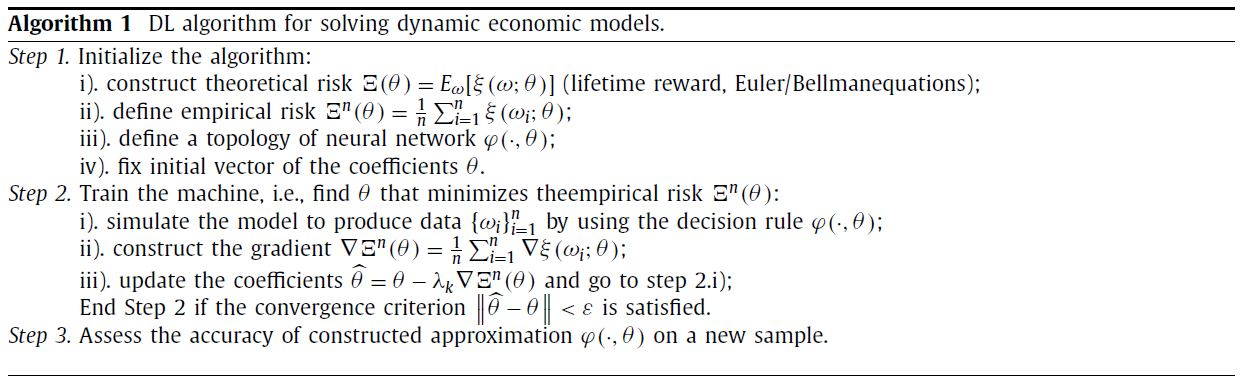 <br/>
 source: MMW(2021)

* **initialized coefficients $\theta$** <br/>

 They are attached to the perceptron object and stored in the computational graph by tensorflow. <br/>

 $\Rightarrow$ we can recovoer these variables and print these values. <br/>

In [20]:
theta = perceptron.trainable_variables
print(str(theta)[:]) # we truncate output

[<tf.Variable 'dense_2/kernel:0' shape=(5, 32) dtype=float32, numpy=
array([[ 1.97628736e-01, -3.05918217e-01,  2.46778488e-01,
        -9.45274532e-02, -2.85078168e-01,  2.42749453e-01,
         8.62858891e-02, -8.54322314e-03, -2.82889336e-01,
        -9.46077704e-03,  3.37597847e-01, -2.80831277e-01,
        -2.18771130e-01,  2.04585135e-01,  1.62530482e-01,
        -1.64416030e-01, -1.54516190e-01,  1.14729106e-01,
        -2.52094626e-01,  8.15525055e-02, -1.77977294e-01,
         8.63784254e-02, -3.72334987e-01, -2.31582746e-01,
         2.59410560e-01, -9.20326412e-02,  3.45172882e-02,
         2.17152834e-02,  3.47302616e-01,  3.01654041e-01,
        -3.88242841e-01,  2.58060575e-01],
       [-8.14324021e-02,  2.39641070e-02, -2.51947820e-01,
        -7.62066245e-03, -2.65014350e-01,  3.62090647e-01,
         3.16909611e-01,  3.03835690e-01, -2.05509797e-01,
         3.36912036e-01,  1.34172440e-01,  8.83137882e-02,
         1.03969038e-01,  3.77891481e-01,  7.96547830e-02,
   

* **update rule** <br/>

 $\theta_{k+1}\;\longleftarrow\;\theta_{k}-\lambda_{k}\nabla\Xi^{n}(\theta)$ <br/>

 , where <br/>

 $\lambda$: learning rate <br/> 
 
 $\nabla\Xi^{n}(\theta)=\frac{1}{n}\sum^{n}_{i=1}\nabla_{\theta}\xi(\omega_{i};\theta_{k})$ <br/> <br/>

* **stochastic gradient descent(SGD)** <br/>

 $\nabla_{\theta}\Xi(\theta_{k})=\nabla_{\theta} E_{\omega}[\xi(\omega_{i};\theta_{k})]\approx\nabla_{\theta}\xi(\omega_{i};\theta_{k})$ <br/>

 cumulative average <br/>

 $\Rightarrow$ $\frac{1}{K}\sum^{K}_{k=1}\nabla_{\theta}\xi(\omega_{k};\theta_{k})\longrightarrow\nabla_{\theta}\Xi(\theta_{k})$ <br/>

 $\Rightarrow$ $\theta_{k}\longrightarrow\theta$ <br/>

In [21]:
variables = perceptron.trainable_variables
optimizer = Adam()
# optimizer = SGD() # SGD can be used in place of Adam

In [22]:
@tf.function
def training_step():

    with tf.GradientTape() as tape:
        
        xx = Xi(n)

    grads = tape.gradient(xx, theta)
    optimizer.apply_gradients(zip(grads,theta))

    return xx

In [23]:
def training_iter(num_epoch):

    vals = []
    
    for k in tqdm(tf.range(num_epoch)):

        val = training_step()
        vals.append(val.numpy())
        
    return vals

In [24]:
# with writer.as_default():
results = training_iter(10000)

100%|██████████| 10000/10000 [00:13<00:00, 767.47it/s]


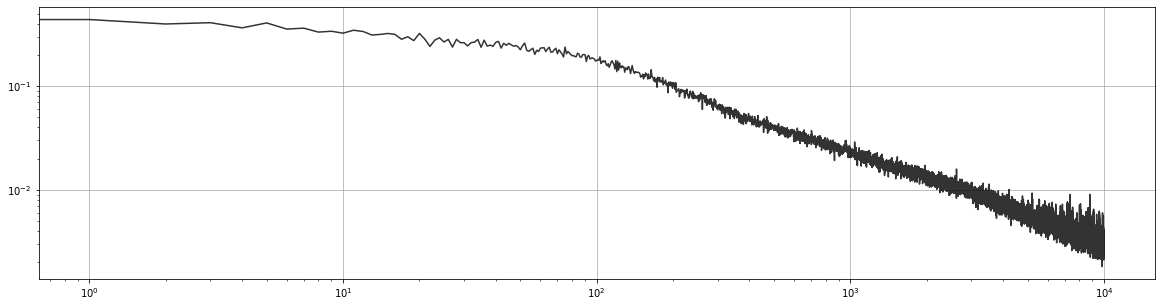

In [25]:
# xp = np.arange(0, 10000, 1).reshape(-1, 1)

plt.figure(figsize=(20, 5))

plt.plot(np.sqrt(results), color='black', alpha=0.8)
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.show()

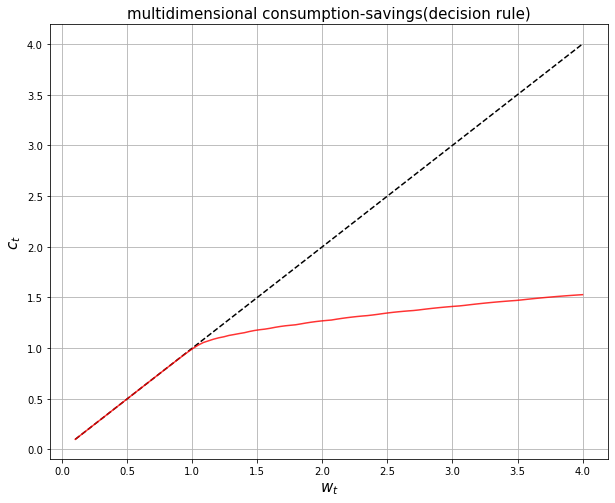

In [26]:
w_vec = np.linspace(w_min, w_max, 100)
zeta_vec, h_vec = dr(w_vec*0, w_vec*0, w_vec*0, w_vec*0, w_vec)

plt.figure(figsize=(10, 8))

plt.title('multidimensional consumption-savings(decision rule)', fontsize=15)
plt.plot(w_vec, w_vec, linestyle='--', color='black')
plt.plot(w_vec, w_vec*zeta_vec, color='red', alpha=0.8)
plt.xlabel('$w_t$', fontsize=15)
plt.ylabel('$c_t$', fontsize=15)
plt.grid()

plt.show()

## **4. python code**

In [27]:
class Euler_Residual:

    def __init__(self, iter, dense_1, dense_2, dense_3, optimizer, lr, n_batch):

        self.iter = iter
        self.dense_1 = dense_1
        self.dense_2 = dense_2
        self.dense_3 = dense_3
        self.optimizer = optimizer
        self.lr = lr
        self.n_batch = n_batch

    def er(self):

        # model parameters

        beta = 0.9 
        gamma = 2.0 
        sigma = 0.1  
        rho = 0.9

        sigma_p = 0.0001
        rho_p = 0.999

        sigma_q = 0.001
        rho_q = 0.9

        sigma_r = 0.001
        rho_r = 0.2

        sigma_delta = 0.001
        rho_delta = 0.2

        rbar = 1.04
    
        # std.dev. for ergodic(normal) distributions of exogenous state variables
        sigma_e_r = sigma_r/(1-rho_r**2)**0.5
        sigma_e_p = sigma_p/(1-rho_p**2)**0.5
        sigma_e_q = sigma_q/(1-rho_q**2)**0.5
        sigma_e_delta = sigma_delta/(1-rho_delta**2)**0.5

        # bounds for endogenous state variable
        w_min = 0.1
        w_max = 4.0

        # Fischer-Burmeister (FB) in TensorFlow
        min_FB = lambda a,b: a+b-tf.sqrt(a**2+b**2)

        # construction of neural network
        layers = [tf.keras.layers.Dense(self.dense_1, activation='relu', input_dim=5, bias_initializer='he_uniform'),
                  tf.keras.layers.Dense(self.dense_2, activation='relu'),
                  tf.keras.layers.Dense(self.dense_3, activation='relu'),
                  tf.keras.layers.Dense(2, activation=tf.keras.activations.linear)]
          
        perceptron = tf.keras.Sequential(layers)

        def dr(r: Vector, delta: Vector, q: Vector, p: Vector, w: Vector)-> Tuple[Vector, Vector]:

            # we normalize exogenous state variables by their 2 standard deviations 
            # so that they are typically between -1 and 1 
            r = r/sigma_e_r/2
            delta = delta/sigma_e_delta/2
            q = q/sigma_e_q/2
            p = p/sigma_e_p/2
    
            # we normalze income to be between -1 and 1
            w = (w-w_min)/(w_max-w_min)*2.0-1.0

            # we prepare input to the perceptron
            s = tf.concat([_e[:,None] for _e in [r,delta,q,p,w]], axis=1) # equivalent to np.column_stack

            x = perceptron(s) # n x 2 matrix 

            # consumption share is always in [0,1]
            zeta = tf.sigmoid(x[:,0])
    
            # expectation of marginal consumption is always positive
            h = tf.exp(x[:,1])
    
            return (zeta, h)

        def Residuals(e_r: Vector, e_delta: Vector, e_q: Vector, e_p: Vector, r: Vector, delta: Vector, q: Vector, p: Vector, w: Vector):

            # all inputs are expected to have the same size n
            n = tf.size(r)

            # arguments correspond to the values of the states today
            zeta, h = dr(r, delta, q, p, w)
            c = zeta*w

            # transitions of the exogenous processes
            r_next = r*rho_r + e_r
            delta_next = delta*rho_delta + e_delta
            p_next = p*rho_p + e_p
            q_next = q*rho_q + e_q
            # (epsilon = (r_next, delta_next, p_next, q_next))
    
            # transition of endogenous states (next denotes variables at t+1)
            w_next = tf.exp(p_next)*tf.exp(q_next) + (w-c)*rbar*tf.exp(r_next)

            zeta_next, h_next = dr(r_next, delta_next, q_next, p_next, w_next)
            cnext = zeta_next*w_next

            R1 = beta*tf.exp(delta_next-delta)*(cnext/c)**(-gamma)*rbar*tf.exp(r_next) - h
            R2 = min_FB(1-h,1-zeta)

            return (R1, R2)
        
        def Xi(n): # objective function for DL training

            # randomly drawing current states
            r = tf.random.normal(shape=(n,), stddev=sigma_e_r)
            delta = tf.random.normal(shape=(n,), stddev=sigma_e_delta)
            p = tf.random.normal(shape=(n,), stddev=sigma_e_p)
            q = tf.random.normal(shape=(n,), stddev=sigma_e_q)
            w = tf.random.uniform(shape=(n,), minval=w_min, maxval=w_max)
 
            # randomly drawing 1st realization for shocks
            e1_r = tf.random.normal(shape=(n,), stddev=sigma_r)
            e1_delta = tf.random.normal(shape=(n,), stddev=sigma_delta)
            e1_p = tf.random.normal(shape=(n,), stddev=sigma_p)
            e1_q = tf.random.normal(shape=(n,), stddev=sigma_q)

            # randomly drawing 2nd realization for shocks
            e2_r = tf.random.normal(shape=(n,), stddev=sigma_r)
            e2_delta = tf.random.normal(shape=(n,), stddev=sigma_delta)
            e2_p = tf.random.normal(shape=(n,), stddev=sigma_p)
            e2_q = tf.random.normal(shape=(n,), stddev=sigma_q)
    
            # residuals for n random grid points under 2 realizations of shocks
            R1_e1, R2_e1 = Residuals(e1_r, e1_delta, e1_p, e1_q, r, delta, q, p, w)
            R1_e2, R2_e2 = Residuals(e2_r, e2_delta, e2_p, e2_q, r, delta, q, p, w)

            # construct all-in-one expectation operator
            R_squared = R1_e1*R1_e2 + R2_e1*R2_e2 
    
            # compute average across n random draws
            return tf.reduce_mean(R_squared)

        theta = perceptron.trainable_variables
        # print( str(theta)[:1000] ) # we truncate output

        variables = perceptron.trainable_variables

        if self.optimizer == 1:
            optimizer = Adam()

        else :
            optimizer = SGD(self.lr) # SGD can be used in place of Adam

        @tf.function
        def training_step():

            with tf.GradientTape() as tape:
        
                xx = Xi(n)

            grads = tape.gradient(xx, theta)
            optimizer.apply_gradients(zip(grads, theta))

            return xx

        def training_iter(num_epoch):

            vals = []
    
            for k in tqdm(tf.range(num_epoch)):

                val = training_step()
                vals.append(val.numpy())
        
            return vals
        
        # with writer.as_default():
        results = training_iter(self.iter)

        w_vec = np.linspace(w_min, w_max, self.n_batch)

        # r, p, q, delta are zero-mean
        zeta_vec, h_vec = dr(w_vec*0, w_vec*0, w_vec*0, w_vec*0, w_vec)

        return results, zeta_vec, h_vec

    def er_dr_plot(self):

        # xp = np.arange(0, 50000, 1).reshape(-1, 1)
        plt.figure(figsize=(20, 5))

        plt.plot(np.sqrt(self.er()[0]), color='black', alpha=0.8)
        plt.xscale('log')
        plt.yscale('log')
        plt.grid()

        fig_1 = plt.show()

        # bounds for endogenous state variable
        w_min = 0.1
        w_max = 4.0

        w_vec = np.linspace(w_min, w_max, self.n_batch)

        plt.figure(figsize=(10, 8))

        plt.title('multidimensional consumption-savings(decision rule)', fontsize=15)
        plt.plot(w_vec, w_vec, linestyle='--', color='black')
        plt.plot(w_vec, w_vec*self.er()[1], color='red', alpha=0.8)
        plt.xlabel('$w_t$', fontsize=15)
        plt.ylabel('$c_t$', fontsize=15)
        plt.grid()

        fig_2 = plt.show()

        return fig_1, fig_2

instance = [# Euler_Residual(iter, dense_1, dense_2, dense_3, optimizer, lr, n_batch)
            
            # Adam
            Euler_Residual(10, 8, 8, 8, 1, 0.001, 100), # 0
            Euler_Residual(10, 16, 16, 16, 1, 0.001, 100), # 1
            Euler_Residual(10, 32, 32, 32, 1, 0.001, 100), # 2
            Euler_Residual(10, 64, 64, 64, 1, 0.001, 100), # 3
            Euler_Residual(100, 8, 8, 8, 1, 0.001, 100), # 4
            Euler_Residual(100, 16, 16, 16, 1, 0.001, 100), # 5
            Euler_Residual(100, 32, 32, 32, 1, 0.001, 100), # 6
            Euler_Residual(100, 64, 64, 64, 1, 0.001, 100), # 7
            Euler_Residual(1000, 8, 8, 8, 1, 0.001, 100), # 8
            Euler_Residual(1000, 16, 16, 16, 1, 0.001, 100), # 9
            Euler_Residual(1000, 32, 32, 32, 1, 0.001, 100), # 10
            Euler_Residual(1000, 64, 64, 64, 1, 0.001, 100), # 11
            Euler_Residual(10000, 8, 8, 8, 1, 0.001, 100), # 12
            Euler_Residual(10000, 16, 16, 16, 1, 0.001, 100), # 13
            Euler_Residual(10000, 32, 32, 32, 1, 0.001, 100), # 14
            Euler_Residual(10000, 64, 64, 64, 1, 0.001, 100), # 15
            
            # SGD
            Euler_Residual(10, 8, 8, 8, 0, 0.001, 100), # 16
            Euler_Residual(10, 16, 16, 16, 0, 0.001, 100), # 17
            Euler_Residual(10, 32, 32, 32, 0, 0.001, 100), # 18
            Euler_Residual(10, 64, 64, 64, 0, 0.001, 100), # 19
            Euler_Residual(100, 8, 8, 8, 0, 0.001, 100), # 20
            Euler_Residual(100, 16, 16, 16, 0, 0.001, 100), # 21
            Euler_Residual(100, 32, 32, 32, 0, 0.001, 100), # 22
            Euler_Residual(100, 64, 64, 64, 0, 0.001, 100), # 23
            Euler_Residual(1000, 8, 8, 8, 0, 0.001, 100), # 24
            Euler_Residual(1000, 16, 16, 16, 0, 0.001, 100), # 25
            Euler_Residual(1000, 32, 32, 32, 0, 0.001, 100), # 26
            Euler_Residual(1000, 64, 64, 64, 0, 0.001, 100), # 27
            Euler_Residual(10000, 8, 8, 8, 0, 0.001, 100), # 28
            Euler_Residual(10000, 16, 16, 16, 0, 0.001, 100), # 29
            Euler_Residual(10000, 32, 32, 32, 0, 0.001, 100), # 30
            Euler_Residual(10000, 64, 64, 64, 0, 0.001, 100)] # 31

## **5. results**

### **5.1. default**

100%|██████████| 10000/10000 [00:12<00:00, 780.71it/s]


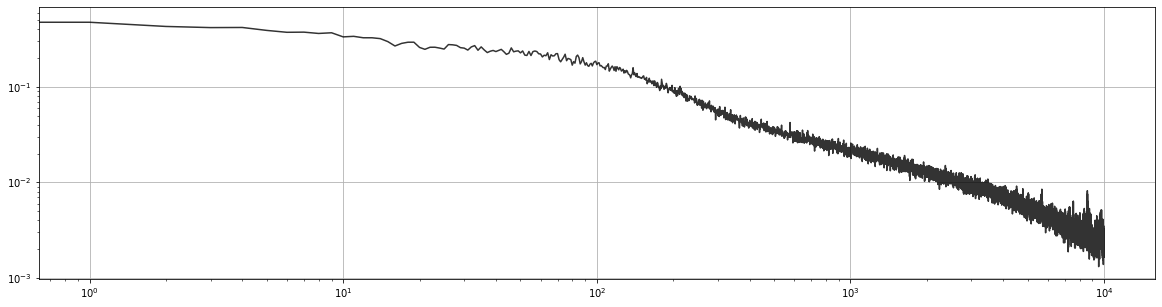

100%|██████████| 10000/10000 [00:11<00:00, 851.00it/s]


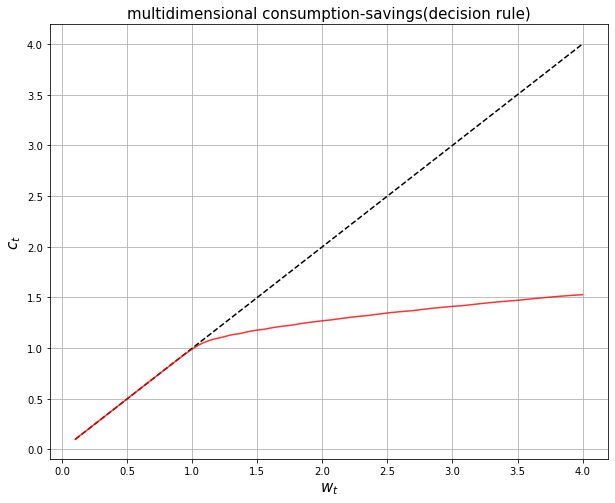

(None, None)

In [28]:
instance[14].er_dr_plot() # Adam

100%|██████████| 10000/10000 [00:13<00:00, 730.82it/s]


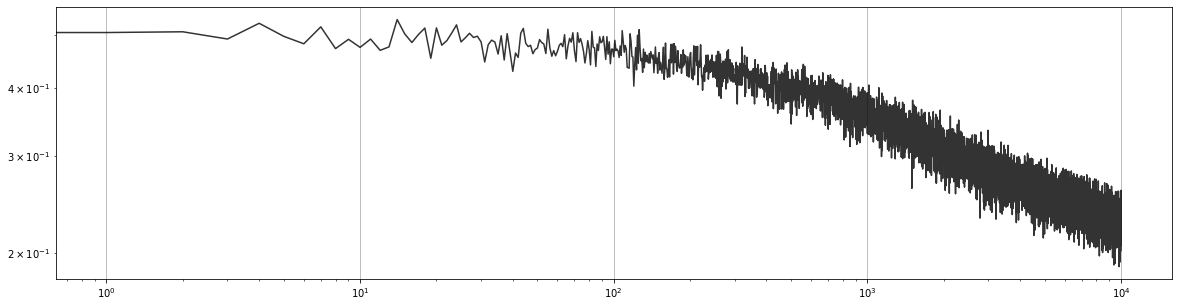

100%|██████████| 10000/10000 [00:13<00:00, 761.45it/s]


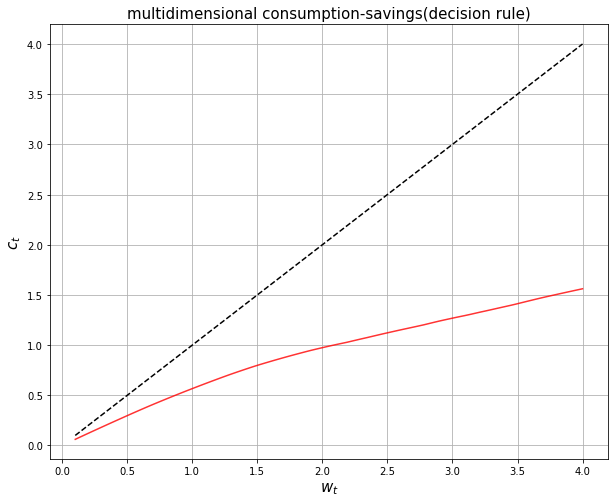

(None, None)

In [29]:
instance[31].er_dr_plot() # SGD

### **5.2. DNN structure**

100%|██████████| 10000/10000 [00:13<00:00, 733.82it/s]


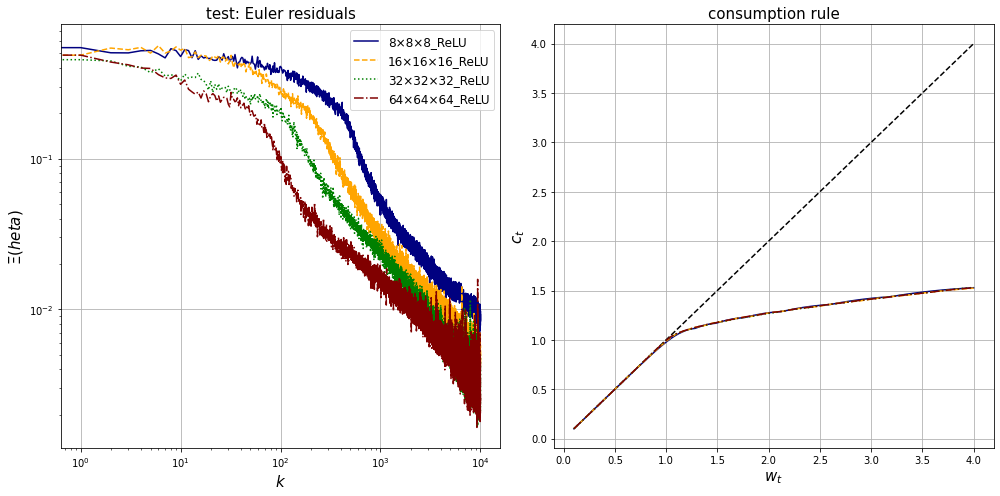

In [30]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)

for i in range(0, 4):

    color_1 = ['navy', 'orange', 'green', 'maroon']
    line_1 = ['solid', 'dashed', 'dotted', 'dashdot']

    plt.plot(np.sqrt(instance[i+12].er()[0]), color=color_1[i], linestyle=line_1[i], alpha=1.0)

model_1 = ['8×8×8_ReLU', '16×16×16_ReLU', '32×32×32_ReLU', '64×64×64_ReLU']

plt.xscale('log')
plt.yscale('log')

plt.title('test: Euler residuals', fontsize=15)
plt.ylabel('$\Xi(\theta)$', fontsize=15)
plt.xlabel('$k$', fontsize=15)
plt.legend(labels=model_1, fontsize=12, loc='upper right', ncol=1)
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(w_vec, w_vec, linestyle='--', color='black')

for i in range(0, 4):

    color_2 = ['navy', 'orange', 'green', 'maroon']
    line_2 = ['solid', 'dashed', 'dotted', 'dashdot']

    plt.plot(w_vec, w_vec*instance[i+12].er()[1], color=color_2[i], linestyle=line_2[i], alpha=1.0)

plt.title('consumption rule', fontsize=15)
plt.xlabel('$w_t$', fontsize=15)
plt.ylabel('$c_t$', fontsize=15)
plt.grid()

plt.tight_layout()
plt.show()

### **5.3. Adam optimizer**

100%|██████████| 10/10 [00:00<00:00, 10.81it/s]


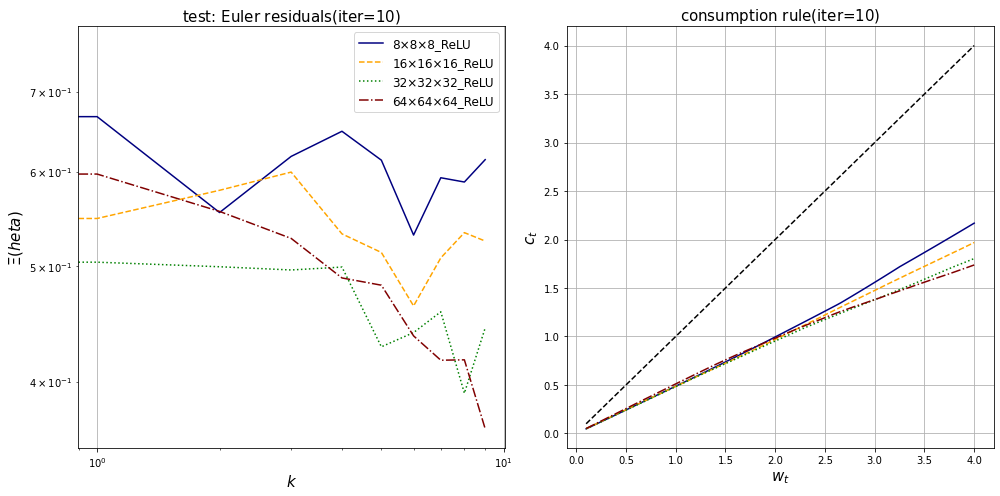

100%|██████████| 100/100 [00:01<00:00, 98.48it/s]


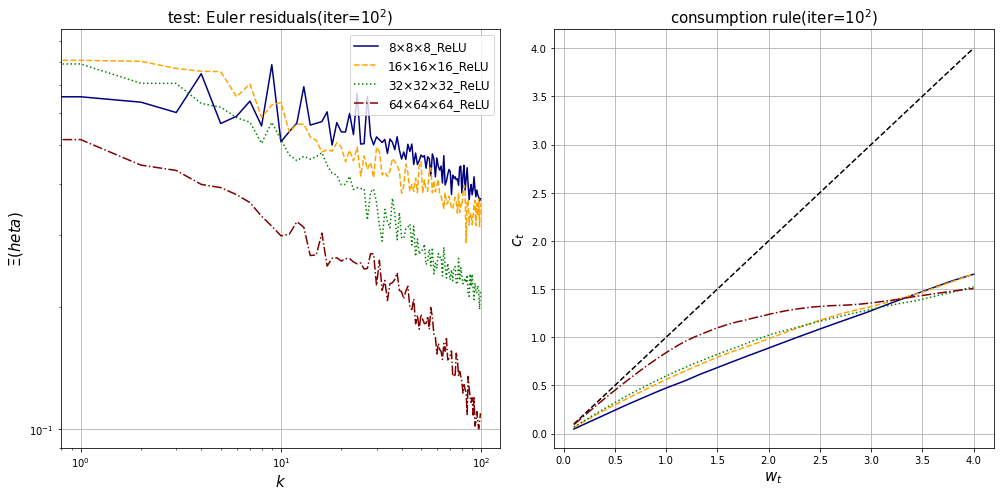

100%|██████████| 1000/1000 [00:02<00:00, 456.10it/s]


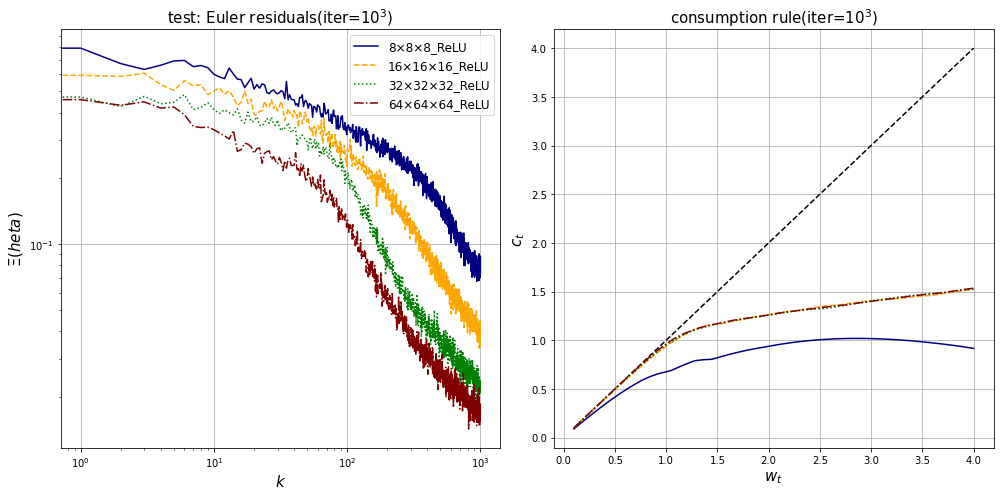

100%|██████████| 10000/10000 [00:15<00:00, 638.65it/s]


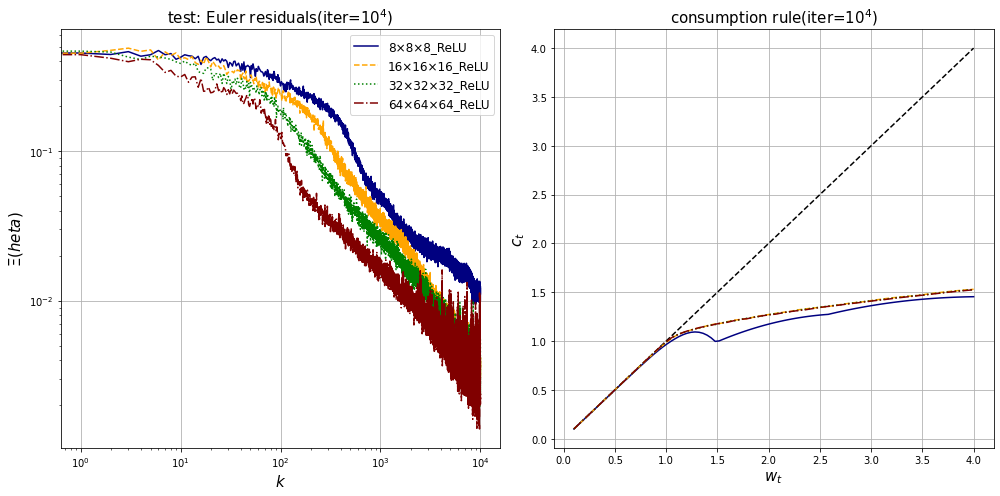

In [31]:
title = ['iter=$10$', 'iter=$10^{2}$', 'iter=$10^{3}$', 'iter=$10^{4}$']

for k in range(0, 4):

    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)

    for i in range(0, 4):

        color_1 = ['navy', 'orange', 'green', 'maroon']
        line_1 = ['solid', 'dashed', 'dotted', 'dashdot']

        plt.plot(np.sqrt(instance[i+4*k].er()[0]), color=color_1[i], linestyle=line_1[i], alpha=1.0)

    model_1 = ['8×8×8_ReLU', '16×16×16_ReLU', '32×32×32_ReLU', '64×64×64_ReLU']

    plt.xscale('log')
    plt.yscale('log')

    plt.title('test: Euler residuals'+'('+title[k]+')', fontsize=15)
    plt.ylabel('$\Xi(\theta)$', fontsize=15)
    plt.xlabel('$k$', fontsize=15)
    plt.legend(labels=model_1, fontsize=12, loc='upper right', ncol=1)
    plt.grid()

    plt.subplot(1, 2, 2)

    plt.plot(w_vec, w_vec, linestyle='--', color='black')

    for i in range(0, 4):

        color_2 = ['navy', 'orange', 'green', 'maroon']
        line_2 = ['solid', 'dashed', 'dotted', 'dashdot']

        plt.plot(w_vec, w_vec*instance[i+4*k].er()[1], color=color_2[i], linestyle=line_2[i], alpha=1.0)

    plt.title('consumption rule'+'('+title[k]+')', fontsize=15)
    plt.xlabel('$w_t$', fontsize=15)
    plt.ylabel('$c_t$', fontsize=15)
    plt.grid()

    plt.tight_layout()
    plt.show()

### **5.4. SGD optimizer**

100%|██████████| 10/10 [00:01<00:00,  8.82it/s]


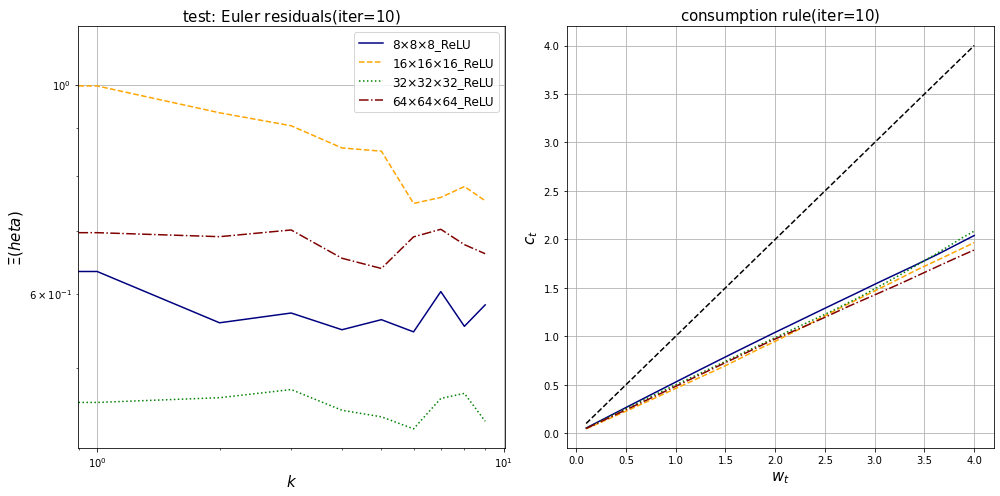

100%|██████████| 100/100 [00:00<00:00, 103.29it/s]


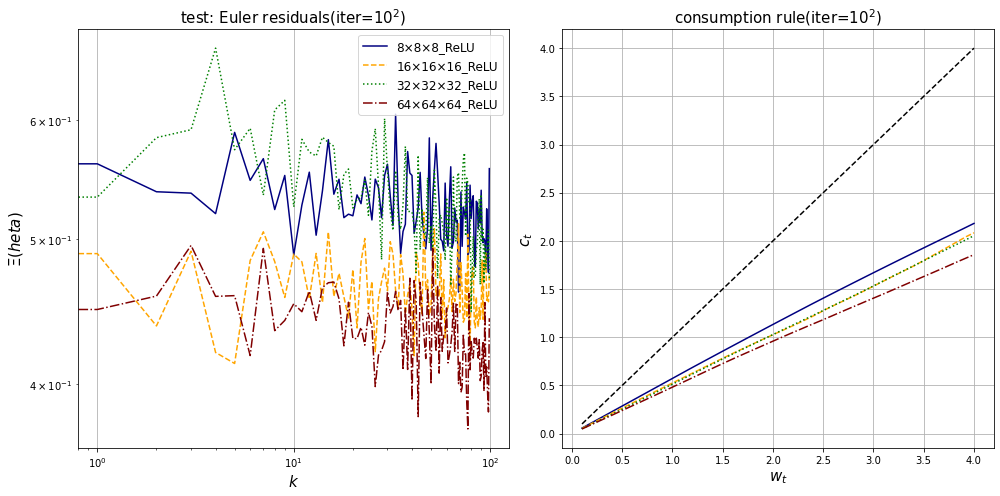

100%|██████████| 1000/1000 [00:02<00:00, 435.99it/s]


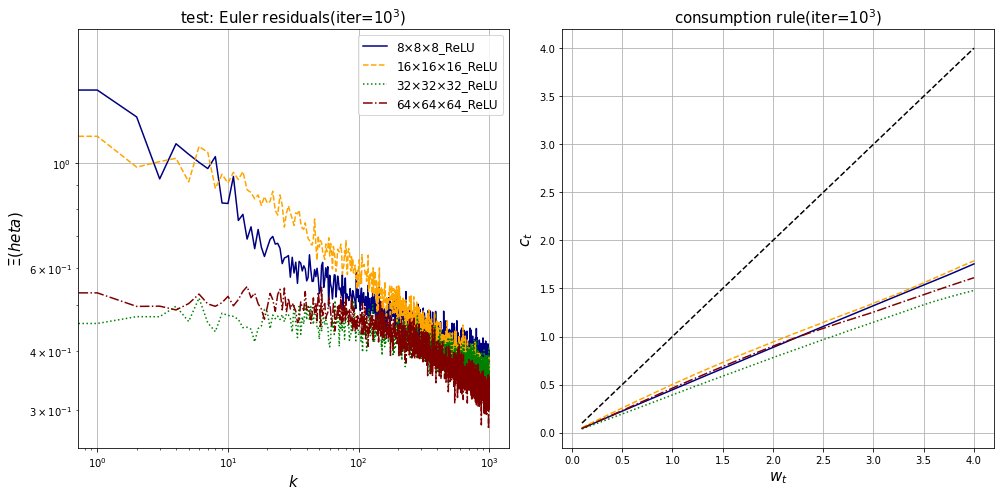

100%|██████████| 10000/10000 [00:15<00:00, 659.94it/s]


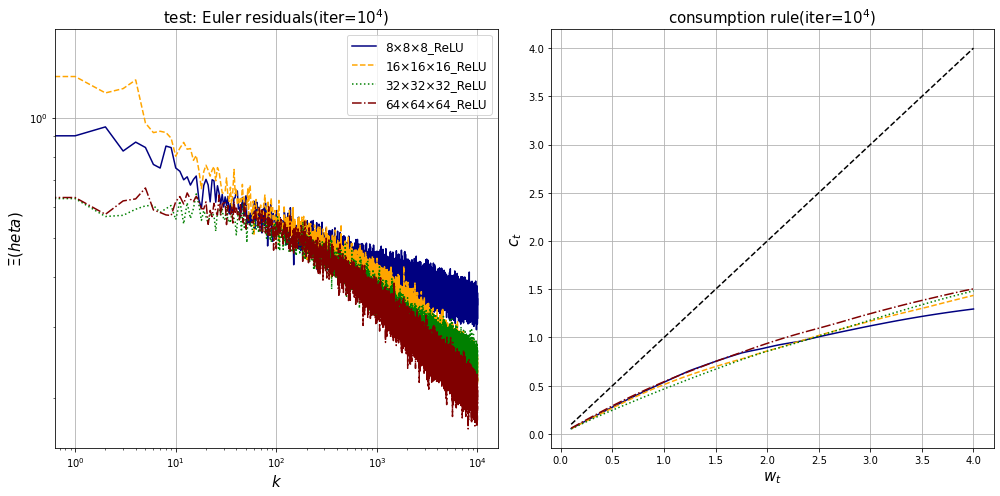

In [32]:
title = ['iter=$10$', 'iter=$10^{2}$', 'iter=$10^{3}$', 'iter=$10^{4}$']

for k in range(4, 8):

    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)

    for i in range(0, 4):

        color_1 = ['navy', 'orange', 'green', 'maroon']
        line_1 = ['solid', 'dashed', 'dotted', 'dashdot']

        plt.plot(np.sqrt(instance[i+4*k].er()[0]), color=color_1[i], linestyle=line_1[i], alpha=1.0)

    model_1 = ['8×8×8_ReLU', '16×16×16_ReLU', '32×32×32_ReLU', '64×64×64_ReLU']

    plt.xscale('log')
    plt.yscale('log')

    plt.title('test: Euler residuals'+'('+title[k-4]+')', fontsize=15)
    plt.ylabel('$\Xi(\theta)$', fontsize=15)
    plt.xlabel('$k$', fontsize=15)
    plt.legend(labels=model_1, fontsize=12, loc='upper right', ncol=1)
    plt.grid()

    plt.subplot(1, 2, 2)

    plt.plot(w_vec, w_vec, linestyle='--', color='black')

    for i in range(0, 4):

        color_2 = ['navy', 'orange', 'green', 'maroon']
        line_2 = ['solid', 'dashed', 'dotted', 'dashdot']

        plt.plot(w_vec, w_vec*instance[i+4*k].er()[1], color=color_2[i], linestyle=line_2[i], alpha=1.0)

    plt.title('consumption rule'+'('+title[k-4]+')', fontsize=15)
    plt.xlabel('$w_t$', fontsize=15)
    plt.ylabel('$c_t$', fontsize=15)
    plt.grid()

    plt.tight_layout()
    plt.show()

## **6. references**

* MMW(2019)
* MMW(2021)
* https://notes.quantecon.org/submission/5ddb3c926bad3800109084bf
* https://gist.github.com/marcmaliar/8142b059c4abc7b7239842560101c40f
* https://i-systems.github.io/teaching/DL/iNotes_tf2/05_ANN_01_tf2.html
* https://i-systems.github.io/teaching/DL/iNotes_tf2/05_ANN_02_tf2.html
* https://lmaliar.ws.gc.cuny.edu/